# Project 2: part1

## Import libraries

In [1]:
from pymonntorch import *
import torch

import matplotlib.pyplot as plt

from models.activity import ActivityRecorder
from models.dendrites import Dendrite
from models.currents import ConstantCurrent, NoisyCurrent, SetCurrent, CurrentSum
from models.neurons import LIF
from models.synapses import SimpleSynapse, FullyConnectedSynapse, RandomConnectedFixedProbSynapse, \
    RandomConnectedFixedInputSynapse
from models.time_res import TimeResolution
from simulate import Simulation

In [2]:
def plot_neuron_activity(net, ng_name, title):

    fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)

    # Plot the membrane potential(voltage)
    axs[0, 0].plot(net[f"{ng_name}_rec", 0].variables["u"][:, :])
    axs[0, 0].axhline(y=net.NeuronGroups[0].behavior[5].init_kwargs['threshold'], color='red', linestyle='--', label=f"{ng_name} Threshold")
    axs[0, 0].set_xlabel('t')
    axs[0, 0].set_ylabel('U(t)')
    axs[0, 0].set_title('Membrane Potential')

    # Plot the current
    axs[1, 0].plot(net[f"{ng_name}_rec", 0].variables["I"][:, :])
    axs[1, 0].set_xlabel('t')
    axs[1, 0].set_ylabel('I(t)')
    axs[1, 0].set_title('Current')

    # Plot the raster plot
    spike_events = net[f"{ng_name}_event", 0].variables["spike"]
    spike_times = spike_events[:, 0]
    neuron_ids = spike_events[:, 1]
    axs[0, 1].scatter(spike_times, neuron_ids, s=5)
    axs[0, 1].set_xlabel('Time')
    axs[0, 1].set_ylabel('Neuron ID')
    axs[0, 1].set_title('Raster Plot for LIF model')

    # Plot the activity
    axs[1, 1].plot(net[f"{ng_name}_rec", 0].variables["activity"])
    axs[1, 1].set_xlabel('Time')
    axs[1, 1].set_ylabel('activity')
    axs[1, 1].set_title('Activity')
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()


def plot_weight_distribution(weight_matrix, bins=50, density=True):
    # Flatten the weight matrix into a 1D array
    weights_flat = weight_matrix.flatten()

    # Plot the distribution using a histogram
    plt.hist(weights_flat, bins=bins, density=density, alpha=0.7, color='b')
    plt.title('Weight Matrix Distribution')
    plt.xlabel('Weight Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Part 1: Implementing synapses mechanism using delta dirac function
The delta dirac function has been implemented in synapses model, here we just use it with an example.

### a) Inside Neuron group synapse:
First let's see the behavior of a neuron group without synapse:

In [3]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_exc1 = sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        3: CurrentSum(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)

sim.simulate(iterations=500)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)3:CurrentSum()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
500xBatch: 1/1 (100%) 262.333ms


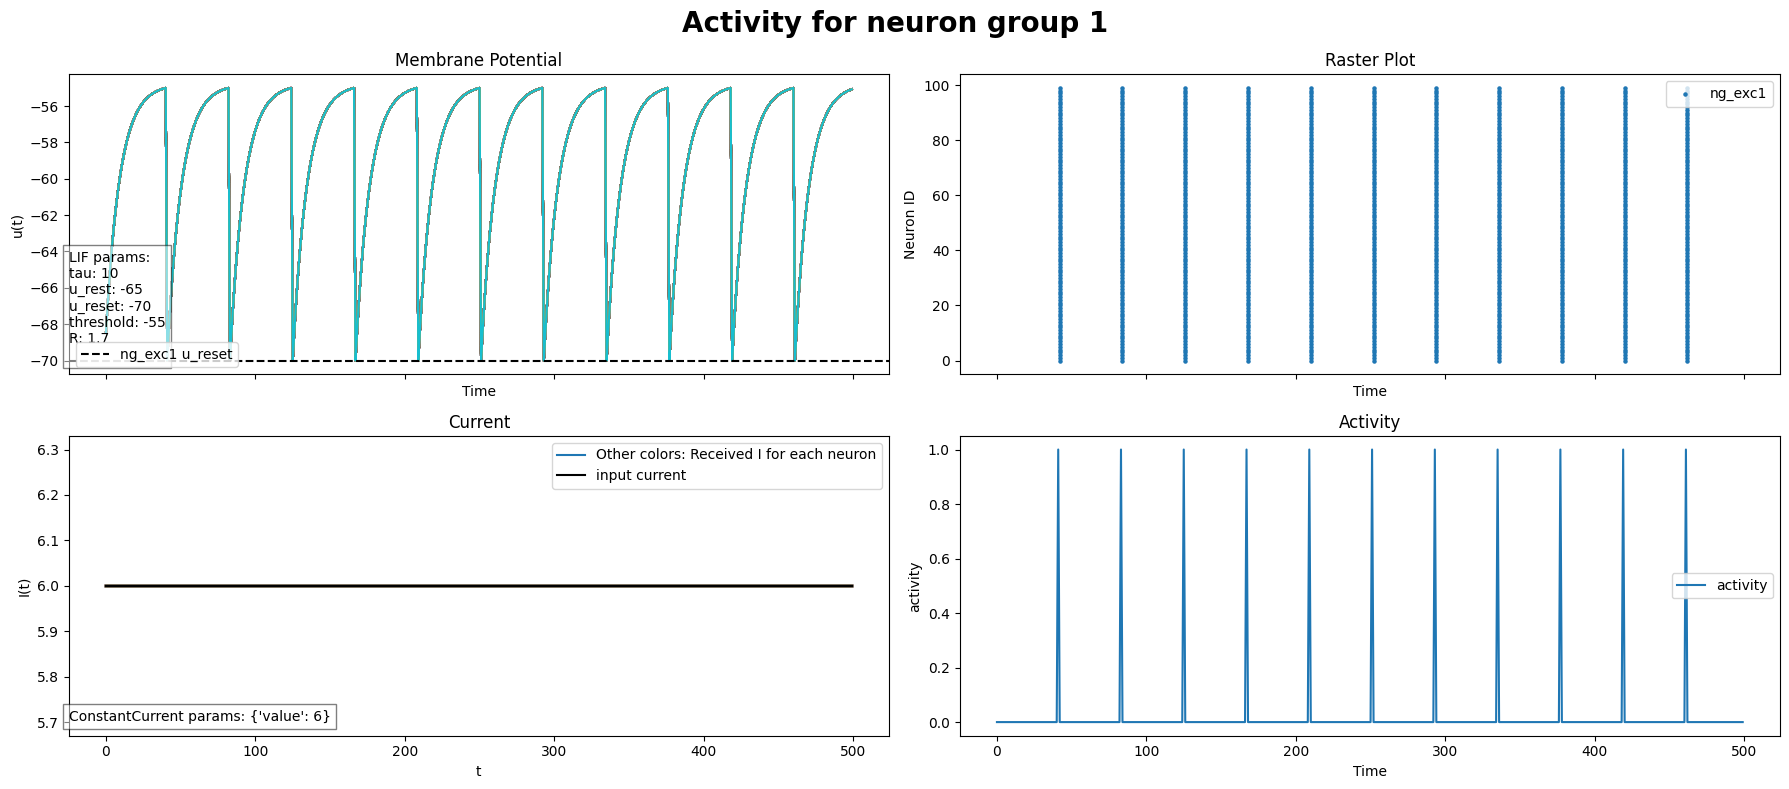

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc1.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_exc1.add_neuron_model_params_info(axs[0, 0], model_idx=7)
ng_exc1.add_current_plot(axs[1, 0])
ng_exc1.add_current_params_info(axs[1,0], current_idx=2)
ng_exc1.add_raster_plot(axs[0, 1])
ng_exc1.add_activity_plot(axs[1, 1])
fig.suptitle("Activity for neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("part1-Simple-ng-without-synapse.pdf")
plt.show()

Now let's change the initial potential

In [5]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_exc1 = sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        3: CurrentSum(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)

sim.simulate(iterations=500)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)3:CurrentSum()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
500xBatch: 1/1 (100%) 276.243ms


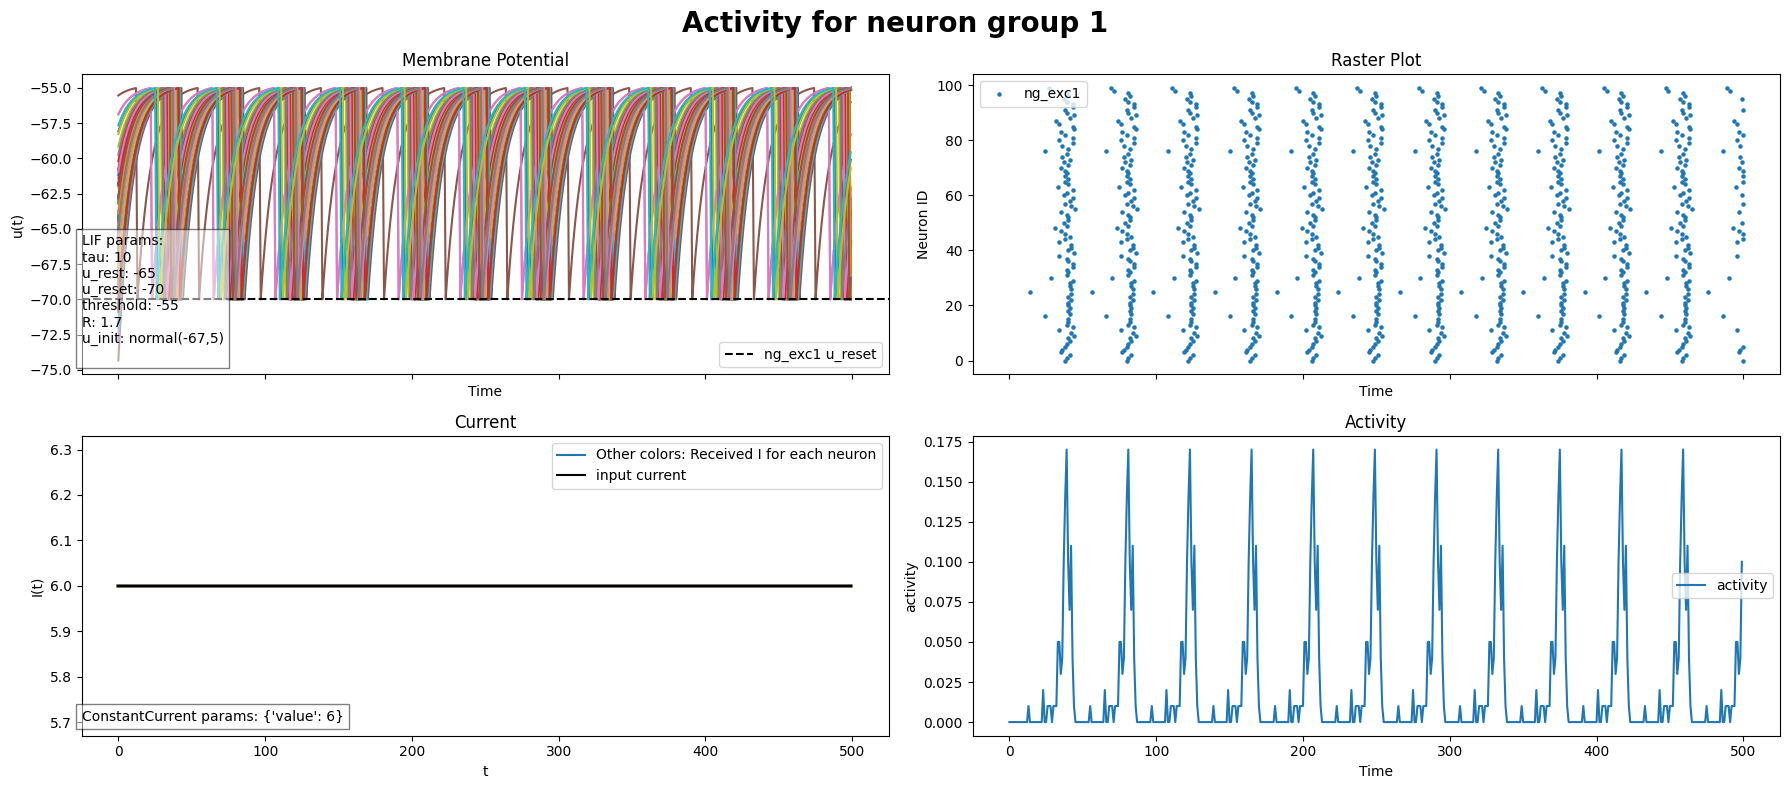

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc1.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_exc1.add_neuron_model_params_info(axs[0, 0], model_idx=7)
ng_exc1.add_current_plot(axs[1, 0])
ng_exc1.add_current_params_info(axs[1,0], current_idx=2)
ng_exc1.add_raster_plot(axs[0, 1])
ng_exc1.add_activity_plot(axs[1, 1])
fig.suptitle("Activity for neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-Simple-ng-without-synapse-u_init.pdf")
plt.show()

now let's test the population with different current.

In [7]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_exc1 = sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        3: NoisyCurrent(iterations=501, mean=0, std=0.1),
        4: CurrentSum(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)

sim.simulate(iterations=500)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)3:NoisyCurrent(iterations=501,mean=0,std=0.1,)4:CurrentSum()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
500xBatch: 1/1 (100%) 312.208ms


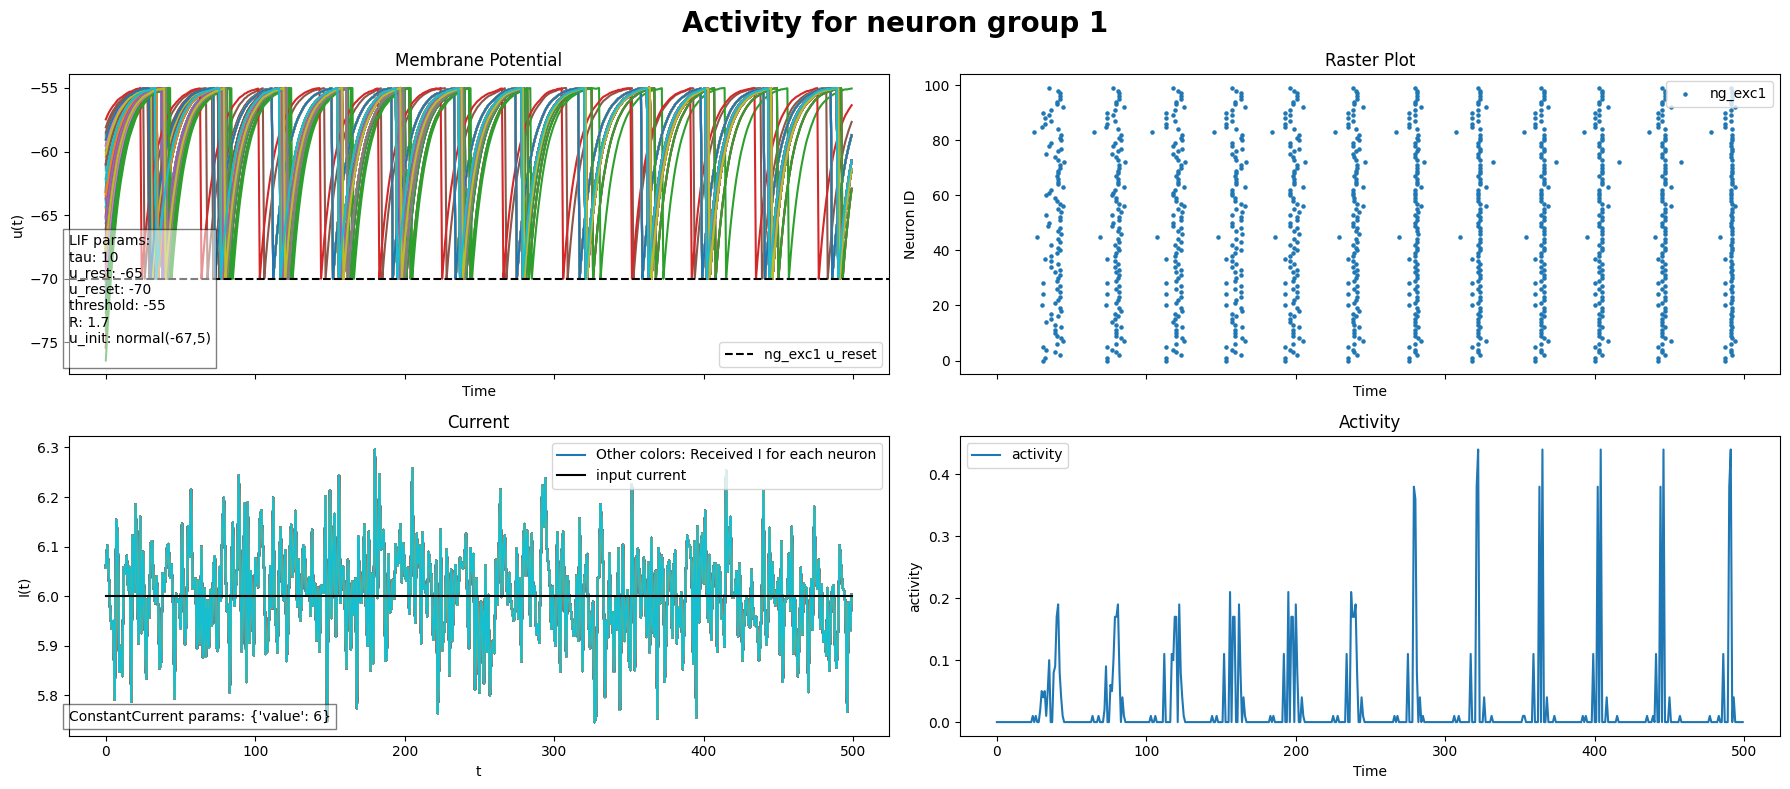

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc1.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_exc1.add_neuron_model_params_info(axs[0, 0], model_idx=7)
ng_exc1.add_current_plot(axs[1, 0])
ng_exc1.add_current_params_info(axs[1,0], current_idx=2)
ng_exc1.add_raster_plot(axs[0, 1])
ng_exc1.add_activity_plot(axs[1, 1])
fig.suptitle("Activity for neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-Simple-ng-without-synapse-noise-curr.pdf")
plt.show()

Add more noise

In [9]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_exc1 = sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        3: NoisyCurrent(iterations=501, mean=0, std=1),
        4: CurrentSum(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)

sim.simulate(iterations=500)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)3:NoisyCurrent(iterations=501,mean=0,std=1,)4:CurrentSum()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
500xBatch: 1/1 (100%) 301.521ms


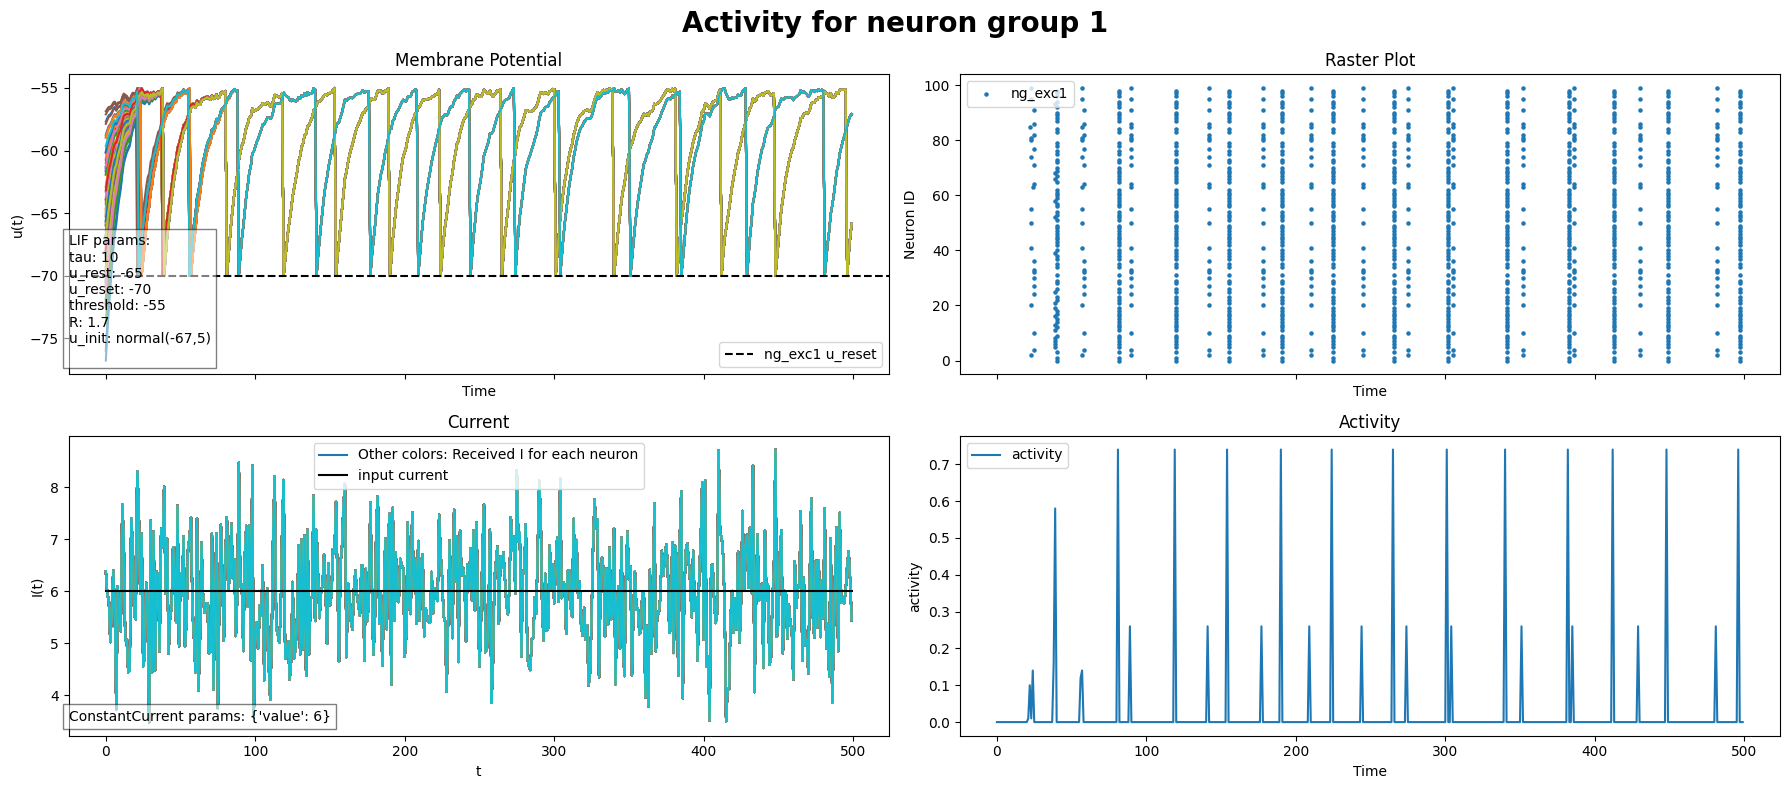

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc1.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_exc1.add_neuron_model_params_info(axs[0, 0], model_idx=7)
ng_exc1.add_current_plot(axs[1, 0])
ng_exc1.add_current_params_info(axs[1,0], current_idx=2)
ng_exc1.add_raster_plot(axs[0, 1])
ng_exc1.add_activity_plot(axs[1, 1])
fig.suptitle("Activity for neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-Simple-ng-without-synapse-high-noise-curr.pdf")
plt.show()

Now let's change the input current of each neuron:

In [11]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_exc1 = sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6, noise_range=0.2),
        4: CurrentSum(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)

sim.simulate(iterations=500)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,noise_range=0.2,)4:CurrentSum()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
500xBatch: 1/1 (100%) 278.719ms


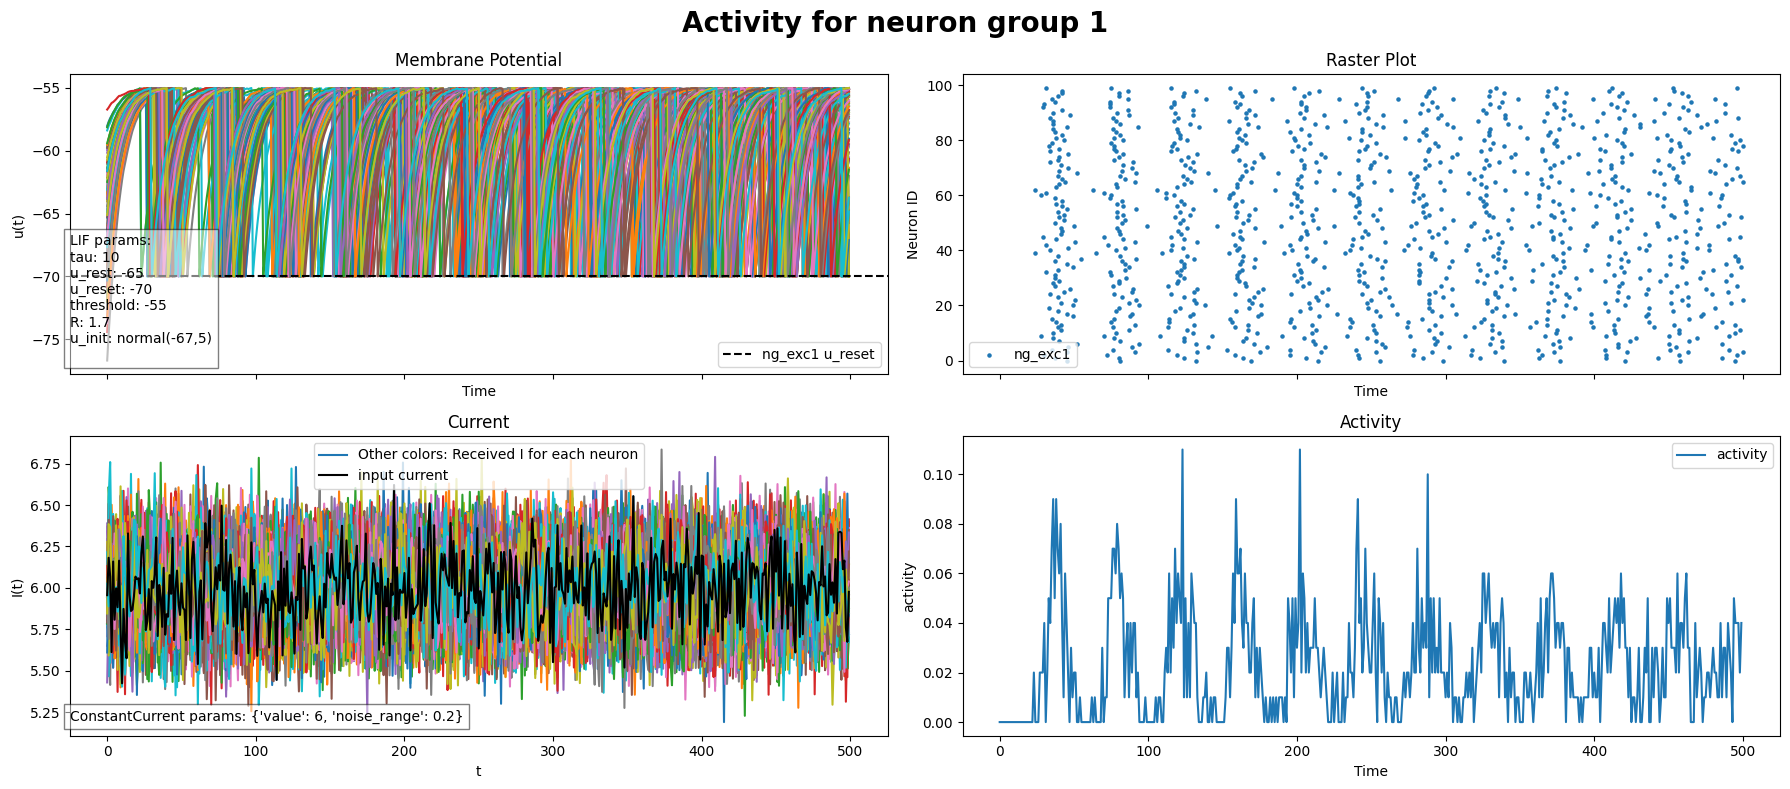

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc1.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_exc1.add_neuron_model_params_info(axs[0, 0], model_idx=7)
ng_exc1.add_current_plot(axs[1, 0])
ng_exc1.add_current_params_info(axs[1,0], current_idx=2)
ng_exc1.add_raster_plot(axs[0, 1])
ng_exc1.add_activity_plot(axs[1, 1])
fig.suptitle("Activity for neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-Simple-ng-without-synapse-variance-curr.pdf")
plt.show()

Add more variance

In [13]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_exc1 = sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6, noise_range=1),
        4: CurrentSum(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)

sim.simulate(iterations=500)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,noise_range=1,)4:CurrentSum()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
500xBatch: 1/1 (100%) 266.008ms


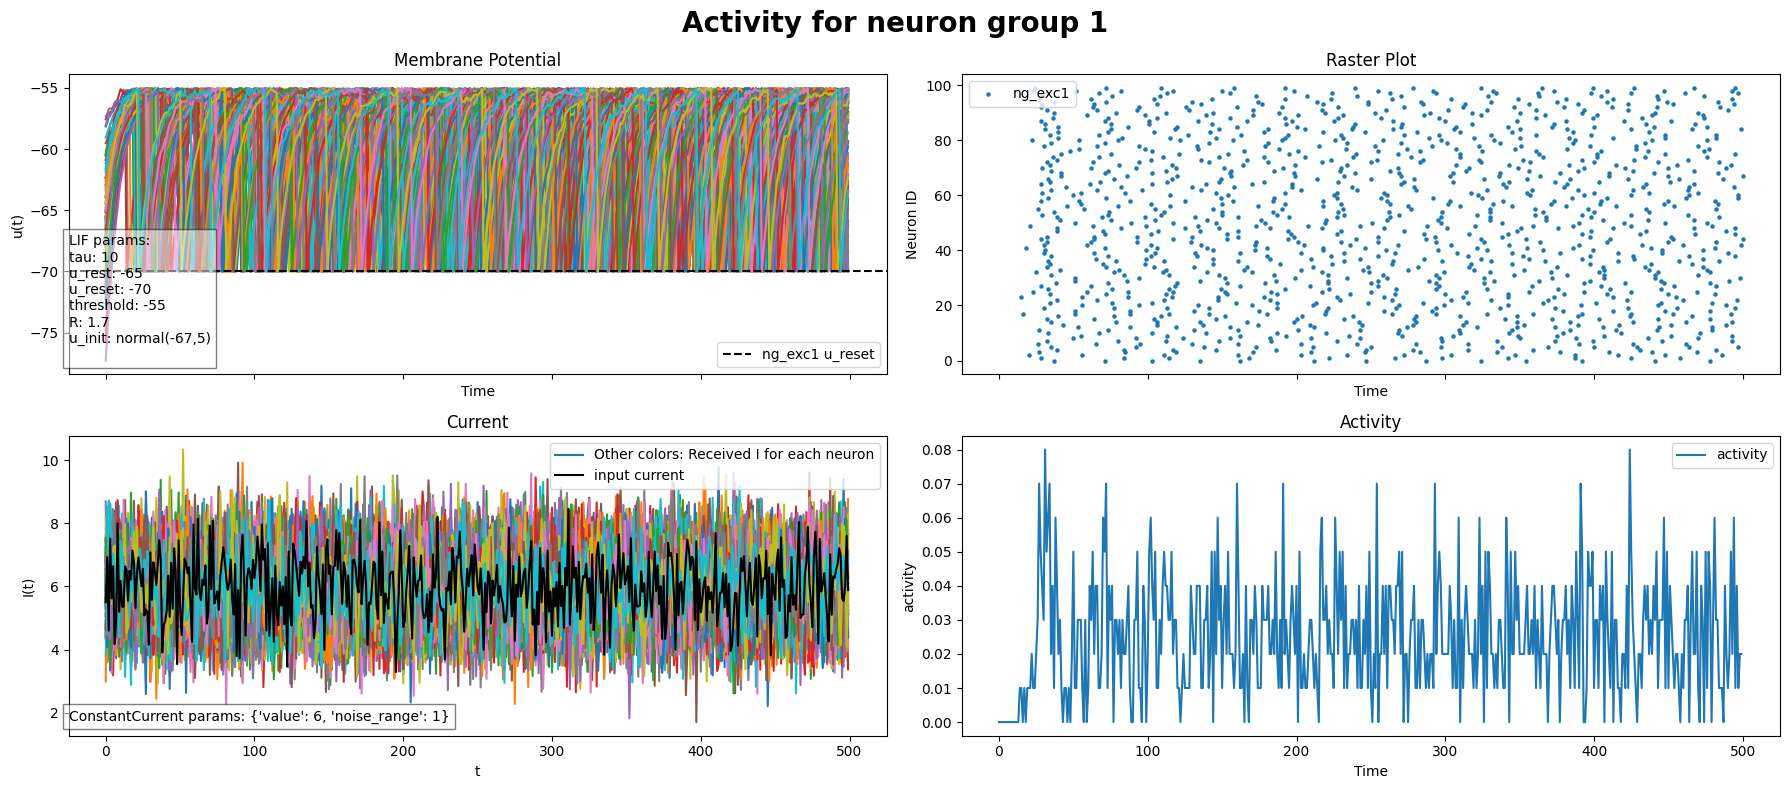

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc1.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_exc1.add_neuron_model_params_info(axs[0, 0], model_idx=7)
ng_exc1.add_current_plot(axs[1, 0])
ng_exc1.add_current_params_info(axs[1,0], current_idx=2)
ng_exc1.add_raster_plot(axs[0, 1])
ng_exc1.add_activity_plot(axs[1, 1])
fig.suptitle("Activity for neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-Simple-ng-without-synapse-high-variance-curr.pdf")
plt.show()

### Add synapse

Now let's create a synapse between neurons of one neuron groups and see the results. Here we don't consider any noise or variance in initial membrane potential:

In [15]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_exc1 = sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            # u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)

syn_exc1 = sim.add_synapse_group(
                   tag="exc-exc",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={3: FullyConnectedSynapse(j0=50, variance=0.0)})

sim.simulate(iterations=500)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
SynapseGroup['exc-exc', 'CustomSynapseGroup', 'syn', 'ng_exc1 => ng_exc1'](S100xD100){3:FullyConnectedSynapse(j0=50,variance=0.0,),}
500xBatch: 1/1 (100%) 312.292ms


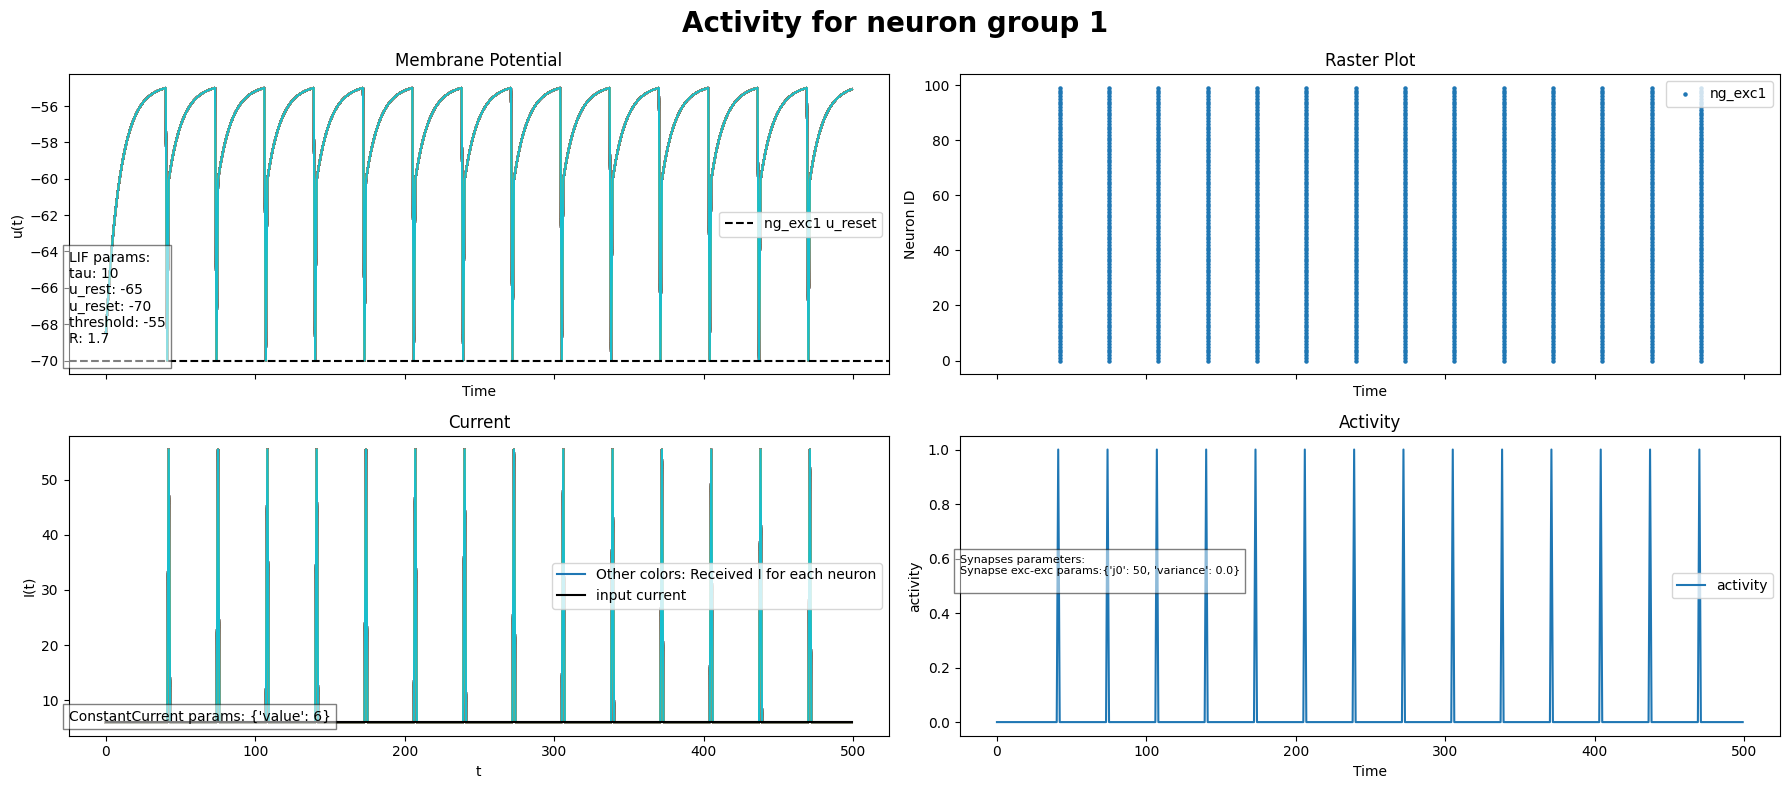

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc1.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_exc1.add_neuron_model_params_info(axs[0, 0], model_idx=7)
ng_exc1.add_current_plot(axs[1, 0])
ng_exc1.add_current_params_info(axs[1,0], current_idx=2)
ng_exc1.add_raster_plot(axs[0, 1])
ng_exc1.add_activity_plot(axs[1, 1])
syn_exc1.add_synapses_params_info(axs[1, 1], synapse_idx=3)
fig.suptitle("Activity for neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-Simple-ng-with-synapse.pdf")
plt.show()

Now we add variance to the initial membrane potential of neurons

In [17]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_exc1 = sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)

syn_exc1 = sim.add_synapse_group(
                   tag="exc-exc",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={3: FullyConnectedSynapse(j0=5, variance=0.0)})

sim.simulate(iterations=500)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
SynapseGroup['exc-exc', 'CustomSynapseGroup', 'syn', 'ng_exc1 => ng_exc1'](S100xD100){3:FullyConnectedSynapse(j0=5,variance=0.0,),}
500xBatch: 1/1 (100%) 329.153ms


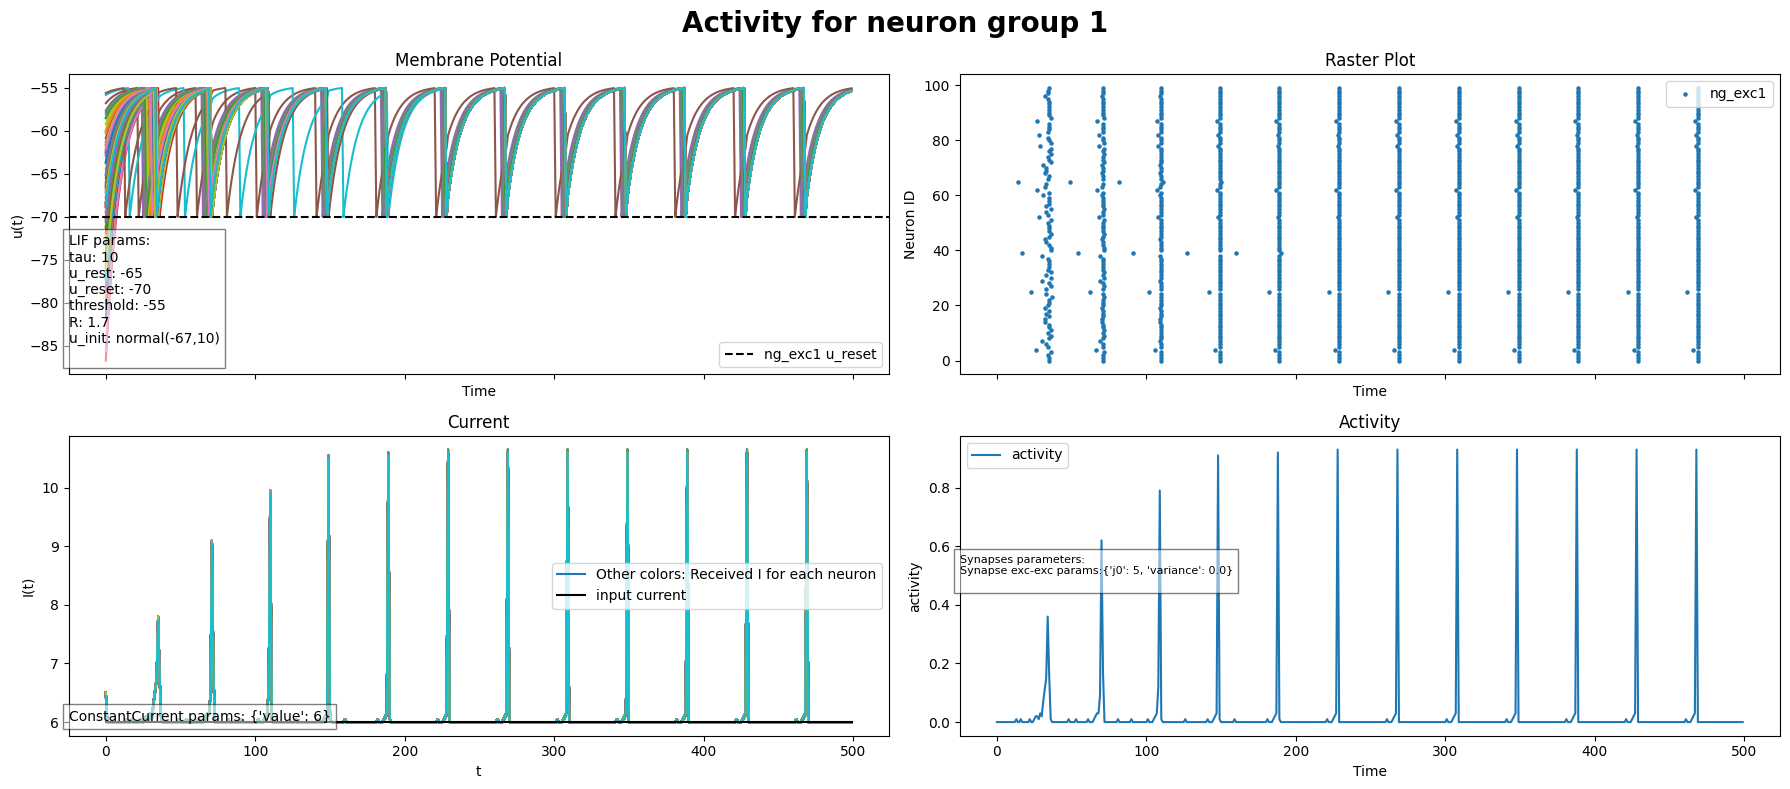

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc1.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_exc1.add_neuron_model_params_info(axs[0, 0], model_idx=7)
ng_exc1.add_current_plot(axs[1, 0])
ng_exc1.add_current_params_info(axs[1,0], current_idx=2)
ng_exc1.add_raster_plot(axs[0, 1])
ng_exc1.add_activity_plot(axs[1, 1])
syn_exc1.add_synapses_params_info(axs[1, 1], synapse_idx=3)
fig.suptitle("Activity for neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-Simple-ng-with-synapse-u_init.pdf")
plt.show()

increase the j0

In [19]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_exc1 = sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)

syn_exc1 = sim.add_synapse_group(
                   tag="exc-exc",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={3: FullyConnectedSynapse(j0=10, variance=0.0)})

sim.simulate(iterations=500)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
SynapseGroup['exc-exc', 'CustomSynapseGroup', 'syn', 'ng_exc1 => ng_exc1'](S100xD100){3:FullyConnectedSynapse(j0=10,variance=0.0,),}
500xBatch: 1/1 (100%) 331.389ms


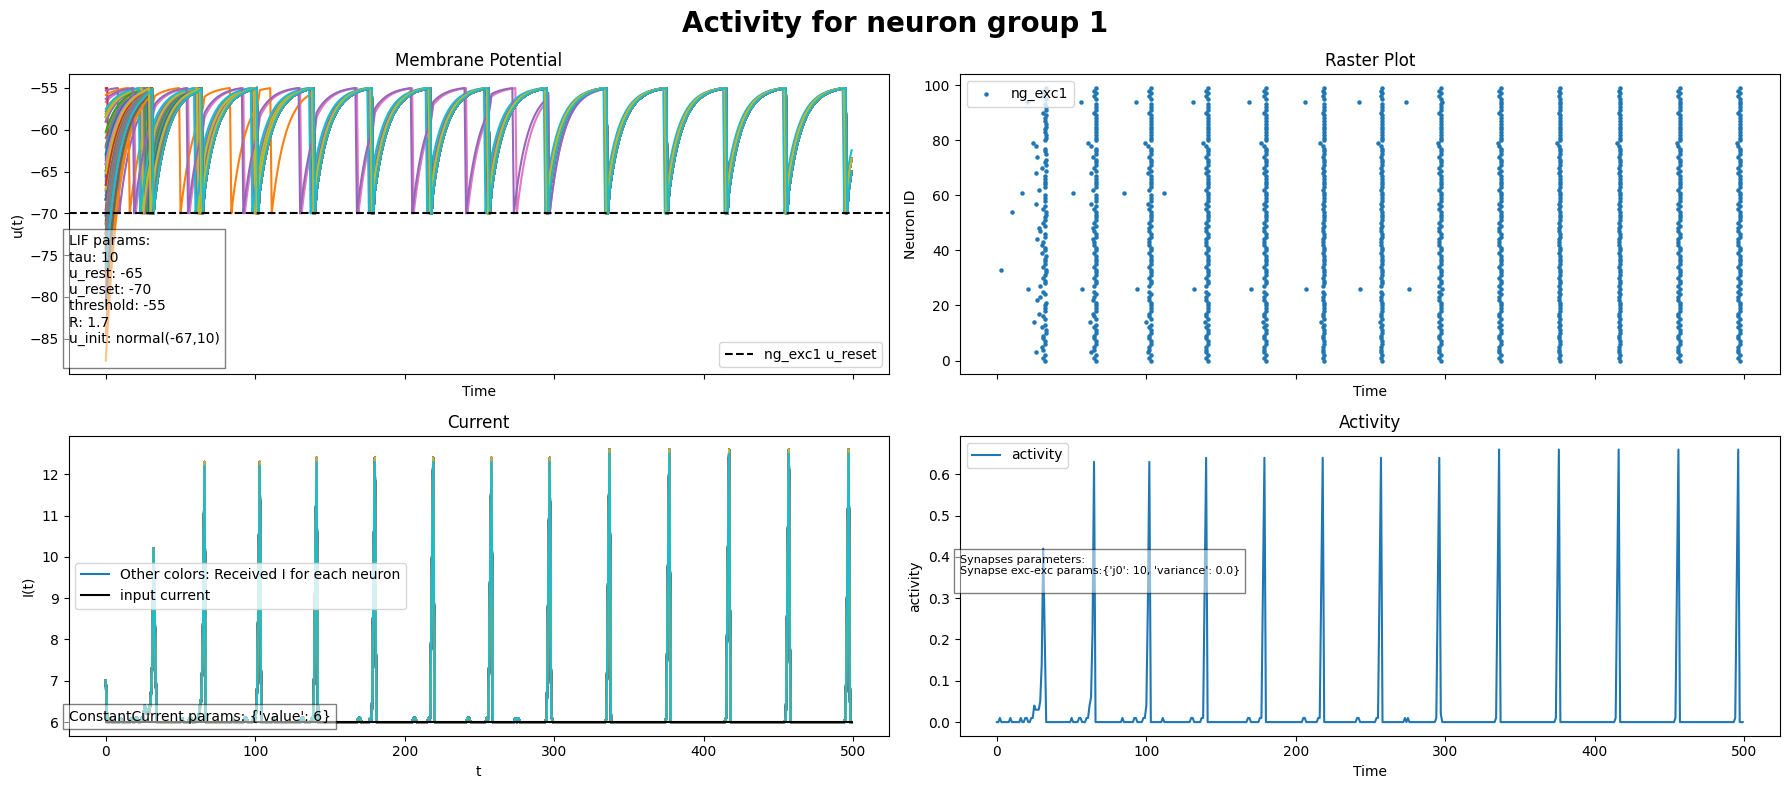

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc1.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_exc1.add_neuron_model_params_info(axs[0, 0], model_idx=7)
ng_exc1.add_current_plot(axs[1, 0])
ng_exc1.add_current_params_info(axs[1,0], current_idx=2)
ng_exc1.add_raster_plot(axs[0, 1])
ng_exc1.add_activity_plot(axs[1, 1])
syn_exc1.add_synapses_params_info(axs[1, 1], synapse_idx=3)
fig.suptitle("Activity for neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-Simple-ng-with-synapse-u_init-high_j.pdf")
plt.show()

Add variance to synapse weights:

In [21]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_exc1 = sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)

syn_exc1 = sim.add_synapse_group(
                   tag="exc-exc",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={3: FullyConnectedSynapse(j0=5, variance=1)})

sim.simulate(iterations=500)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
SynapseGroup['exc-exc', 'CustomSynapseGroup', 'syn', 'ng_exc1 => ng_exc1'](S100xD100){3:FullyConnectedSynapse(j0=5,variance=1,),}
500xBatch: 1/1 (100%) 294.789ms


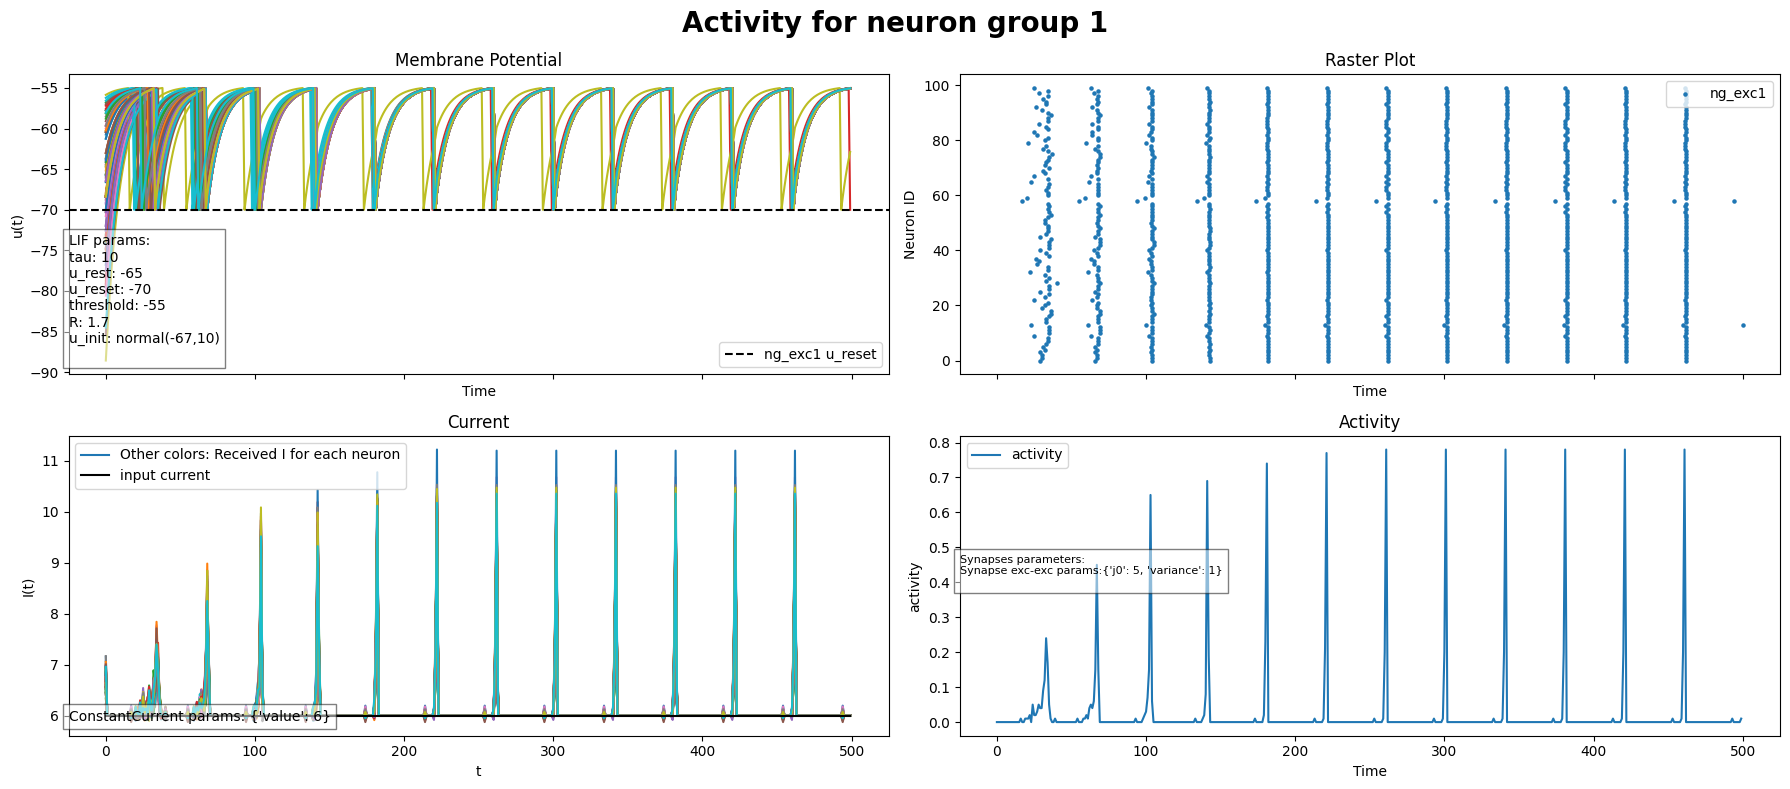

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc1.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_exc1.add_neuron_model_params_info(axs[0, 0], model_idx=7)
ng_exc1.add_current_plot(axs[1, 0])
ng_exc1.add_current_params_info(axs[1,0], current_idx=2)
ng_exc1.add_raster_plot(axs[0, 1])
ng_exc1.add_activity_plot(axs[1, 1])
syn_exc1.add_synapses_params_info(axs[1, 1], synapse_idx=3)
fig.suptitle("Activity for neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-Simple-ng-with-synapse-u_init-variance.pdf")
plt.show()

Now we add noises to input current to simulate behaviors more biologically:

In [23]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_exc1 = sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        3: NoisyCurrent(iterations=501, mean=1, std=1),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)

syn_exc1 = sim.add_synapse_group(
                   tag="exc-exc",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={3: FullyConnectedSynapse(j0=5, variance=0.0)})

sim.simulate(iterations=500)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)3:NoisyCurrent(iterations=501,mean=1,std=1,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
SynapseGroup['exc-exc', 'CustomSynapseGroup', 'syn', 'ng_exc1 => ng_exc1'](S100xD100){3:FullyConnectedSynapse(j0=5,variance=0.0,),}
500xBatch: 1/1 (100%) 332.880ms


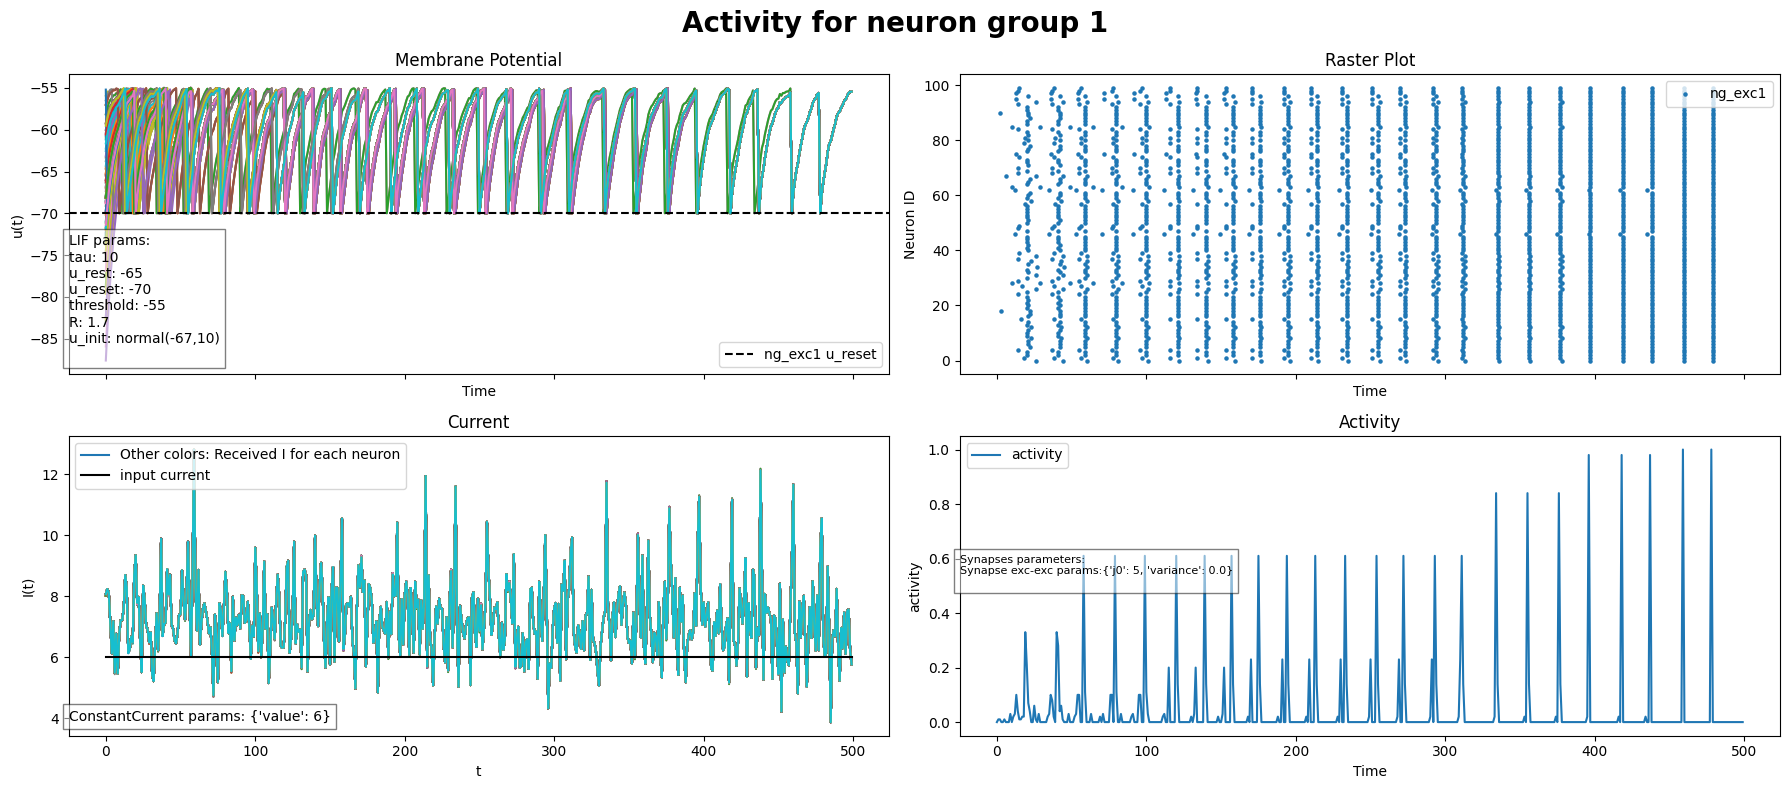

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc1.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_exc1.add_neuron_model_params_info(axs[0, 0], model_idx=7)
ng_exc1.add_current_plot(axs[1, 0])
ng_exc1.add_current_params_info(axs[1, 0], current_idx=2)
ng_exc1.add_raster_plot(axs[0, 1])
ng_exc1.add_activity_plot(axs[1, 1])
syn_exc1.add_synapses_params_info(axs[1, 1], synapse_idx=3)
fig.suptitle("Activity for neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-Simple-ng-with-synapse-noise-curr.pdf")
plt.show()

Now test with different currents:

In [36]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_exc1 = sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6, noise_range=0.6),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)

syn_exc1 = sim.add_synapse_group(
                   tag="exc-exc",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={3: FullyConnectedSynapse(j0=5, variance=0.2)})

sim.simulate(iterations=300)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,noise_range=0.6,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
SynapseGroup['exc-exc', 'CustomSynapseGroup', 'syn', 'ng_exc1 => ng_exc1'](S100xD100){3:FullyConnectedSynapse(j0=5,variance=0.2,),}
300xBatch: 1/1 (100%) 198.388ms


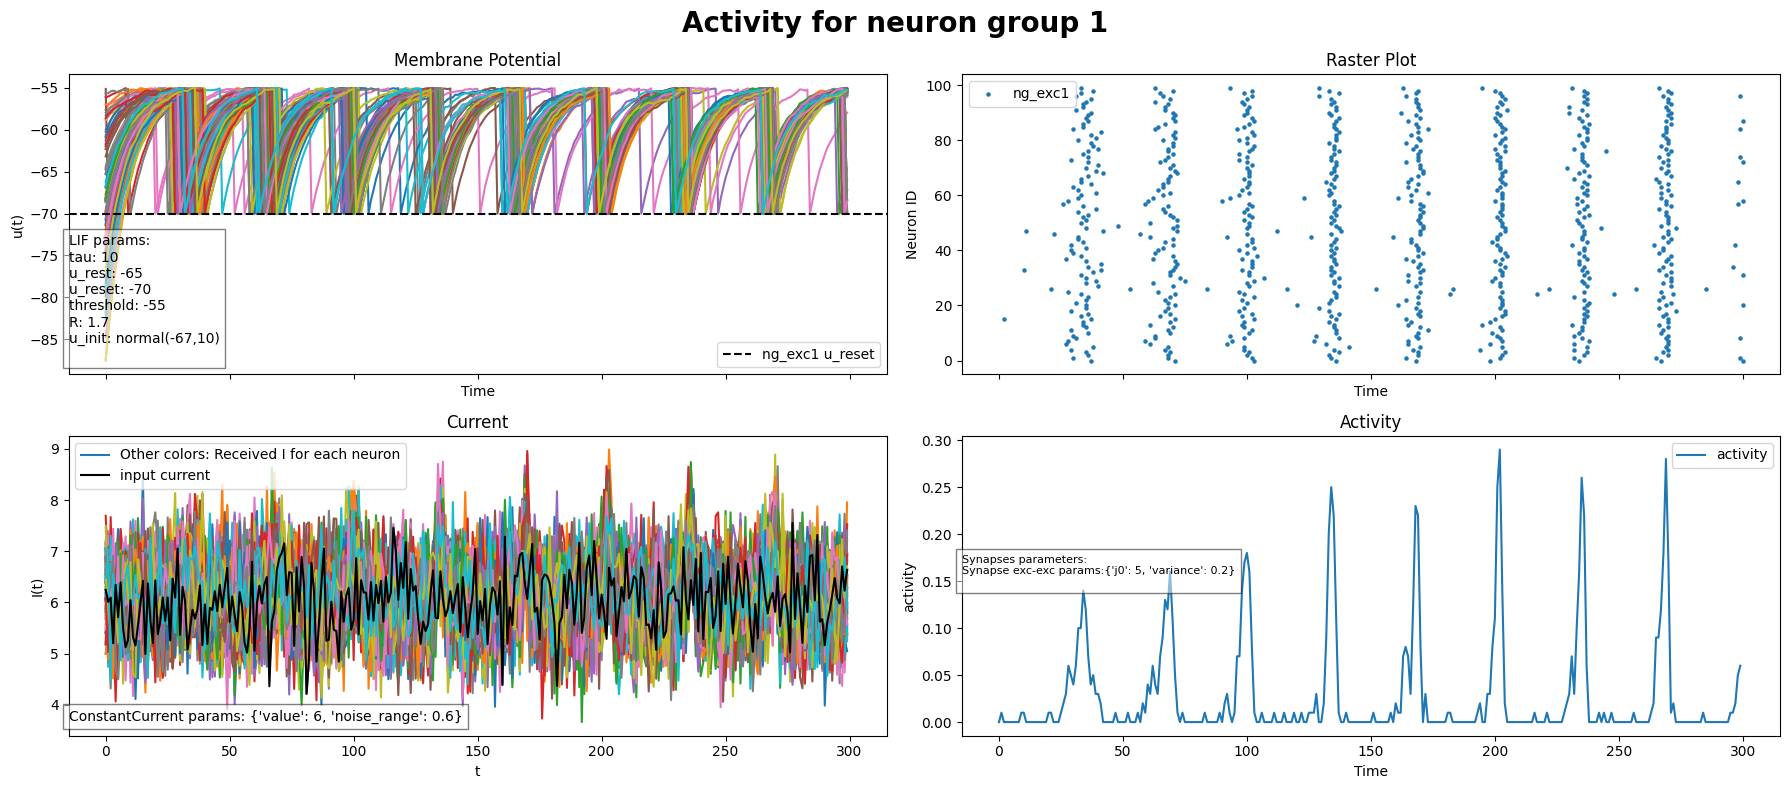

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc1.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_exc1.add_neuron_model_params_info(axs[0, 0], model_idx=7)
ng_exc1.add_current_plot(axs[1, 0])
ng_exc1.add_current_params_info(axs[1, 0], current_idx=2)
ng_exc1.add_raster_plot(axs[0, 1])
ng_exc1.add_activity_plot(axs[1, 1])
syn_exc1.add_synapses_params_info(axs[1, 1], synapse_idx=3)
fig.suptitle("Activity for neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-Simple-ng-with-synapse-diff-curr.pdf")
plt.show()

### b) Synapse between two groups:
Now let's create a synapse between two groups of neurons. First, we test when there's no noise and all neurons begin with the same membrane potential.

In [114]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_pre = sim.add_neuron_group(
    tag="ng_pre",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            # u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_pre_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_pre_event")
    }
)
ng_post = sim.add_neuron_group(
    tag="ng_post",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            # u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_post_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_post_event")
    }
)
syn = sim.add_synapse_group(
                   tag="pre-post",
                   src=ng_pre,
                   dst=ng_post,
                   behavior={3: FullyConnectedSynapse(j0=10, variance=0.2)})

sim.simulate(iterations=300)

Network['Network_1', 'Network'](Neurons: tensor(200)|2 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_pre', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_pre_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_pre_event,)}
NeuronGroup['ng_post', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_post_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_post_event,)}
SynapseGroup['pre-post', 'CustomSynapseGroup', 's

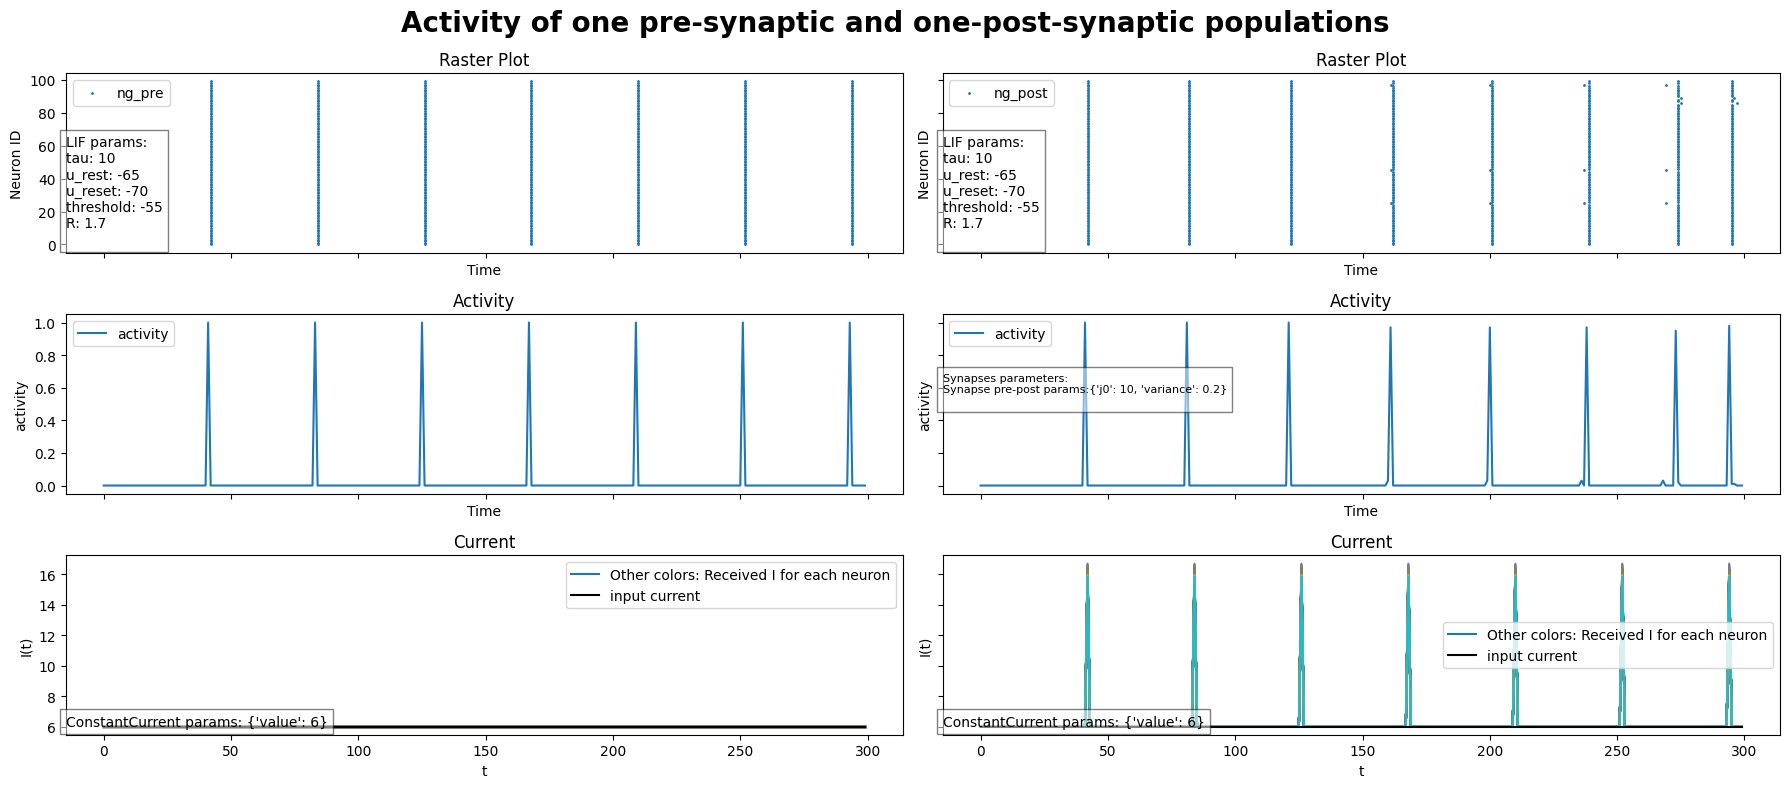

In [115]:
fig, axs = plt.subplots(3, 2, figsize=(18, 8), sharex=True, sharey='row')
# Raster plot for ng1:
ng_pre.add_raster_plot(axs[0, 0], s=1)
ng_pre.add_neuron_model_params_info(axs[0, 0], model_idx=7)
# Raster plot for ng2:
ng_post.add_raster_plot(axs[0, 1], s=1)
ng_post.add_neuron_model_params_info(axs[0, 1], model_idx=7)

# Activity plot for ng1:
ng_pre.add_activity_plot(axs[1, 0])
# Activity plot for ng1:
ng_post.add_activity_plot(axs[1, 1])
syn.add_synapses_params_info(axs[1, 1], synapse_idx=3)

# Current plot for ng1:
ng_pre.add_current_plot(axs[2, 0])
ng_post.add_current_params_info(axs[2, 0], current_idx=2)
# Current plot for ng2:
ng_post.add_current_plot(axs[2, 1])
ng_post.add_current_params_info(axs[2, 1], current_idx=2)


fig.suptitle("Activity of one pre-synaptic and one-post-synaptic populations", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-two-ng-with-synapse.pdf")
plt.show()

Let's add some decay to synapse:

In [116]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_pre = sim.add_neuron_group(
    tag="ng_pre",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            # u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_pre_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_pre_event")
    }
)
ng_post = sim.add_neuron_group(
    tag="ng_post",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            # u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_post_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_post_event")
    }
)
syn = sim.add_synapse_group(
                   tag="pre-post",
                   src=ng_pre,
                   dst=ng_post,
                   behavior={3: FullyConnectedSynapse(j0=10, variance=0.2, alpha=0.2)})

sim.simulate(iterations=300)

Network['Network_1', 'Network'](Neurons: tensor(200)|2 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_pre', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_pre_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_pre_event,)}
NeuronGroup['ng_post', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_post_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_post_event,)}
SynapseGroup['pre-post', 'CustomSynapseGroup', 's

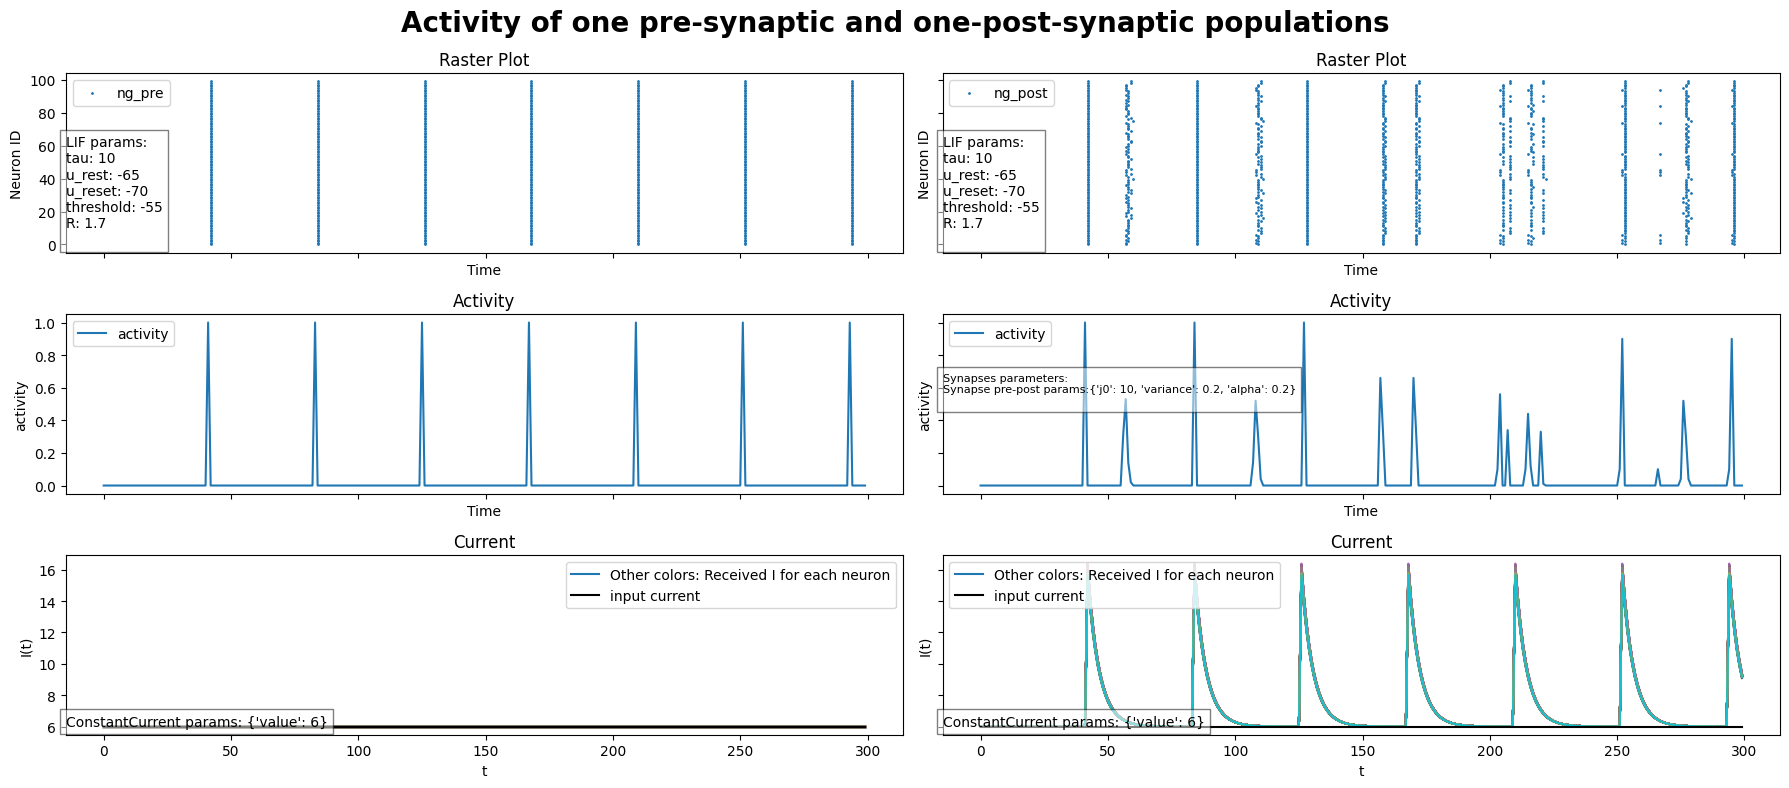

In [117]:
fig, axs = plt.subplots(3, 2, figsize=(18, 8), sharex=True, sharey='row')
# Raster plot for ng1:
ng_pre.add_raster_plot(axs[0, 0], s=1)
ng_pre.add_neuron_model_params_info(axs[0, 0], model_idx=7)
# Raster plot for ng2:
ng_post.add_raster_plot(axs[0, 1], s=1)
ng_post.add_neuron_model_params_info(axs[0, 1], model_idx=7)

# Activity plot for ng1:
ng_pre.add_activity_plot(axs[1, 0])
# Activity plot for ng1:
ng_post.add_activity_plot(axs[1, 1])
syn.add_synapses_params_info(axs[1, 1], synapse_idx=3)

# Current plot for ng1:
ng_pre.add_current_plot(axs[2, 0])
ng_post.add_current_params_info(axs[2, 0], current_idx=2)
# Current plot for ng2:
ng_post.add_current_plot(axs[2, 1])
ng_post.add_current_params_info(axs[2, 1], current_idx=2)


fig.suptitle("Activity of one pre-synaptic and one-post-synaptic populations", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-two-ng-with-synapse-decay.pdf")
plt.show()

As we see, when there is no noise and neuron are the same at the beginning, the destination population spikes whenever the source population spikes. Before adding noise and random distribution at initial neuron, let's cut the destination population current and see the results:

In [110]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_pre = sim.add_neuron_group(
    tag="ng_pre",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_pre_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_pre_event")
    }
)
ng_post = sim.add_neuron_group(
    tag="ng_post",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_post_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_post_event")
    }
)
syn = sim.add_synapse_group(
                   tag="pre-post",
                   src=ng_pre,
                   dst=ng_post,
                   behavior={3: FullyConnectedSynapse(j0=15, variance=0.2)})

sim.simulate(iterations=300)

Network['Network_1', 'Network'](Neurons: tensor(200)|2 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_pre', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_pre_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_pre_event,)}
NeuronGroup['ng_post', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_post_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_post_event,)}
Synap

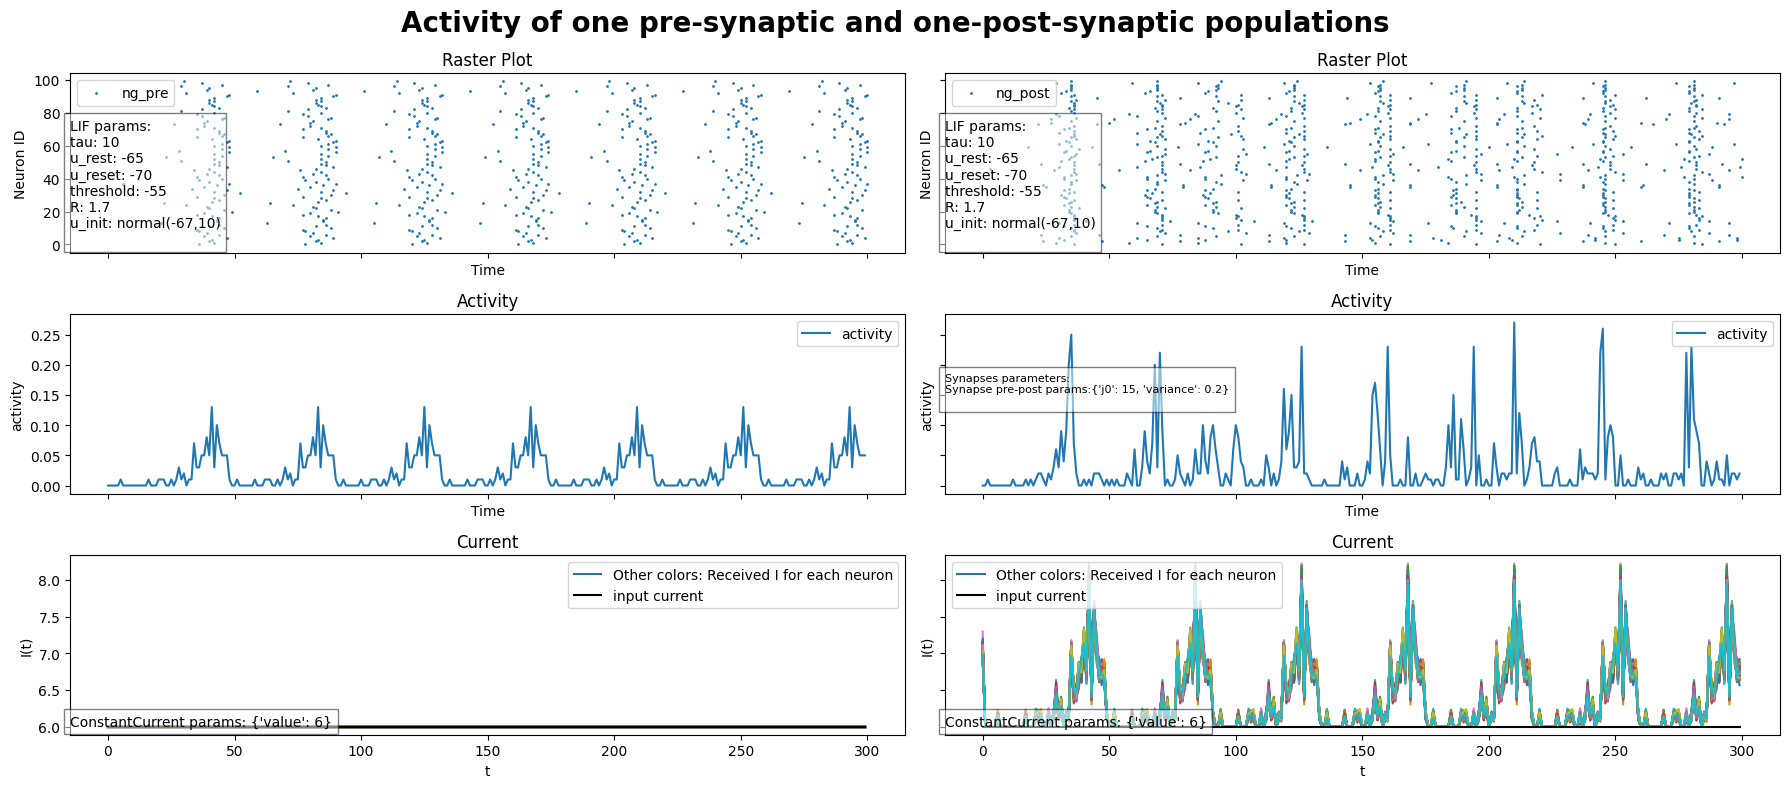

In [111]:
fig, axs = plt.subplots(3, 2, figsize=(18, 8), sharex=True, sharey='row')
# Raster plot for ng1:
ng_pre.add_raster_plot(axs[0, 0], s=1)
ng_pre.add_neuron_model_params_info(axs[0, 0], model_idx=7)
# Raster plot for ng2:
ng_post.add_raster_plot(axs[0, 1], s=1)
ng_post.add_neuron_model_params_info(axs[0, 1], model_idx=7)

# Activity plot for ng1:
ng_pre.add_activity_plot(axs[1, 0])
# Activity plot for ng1:
ng_post.add_activity_plot(axs[1, 1])
syn.add_synapses_params_info(axs[1, 1], synapse_idx=3)

# Current plot for ng1:
ng_pre.add_current_plot(axs[2, 0])
ng_post.add_current_params_info(axs[2, 0], current_idx=2)
# Current plot for ng2:
ng_post.add_current_plot(axs[2, 1])
ng_post.add_current_params_info(axs[2, 1], current_idx=2)


fig.suptitle("Activity of one pre-synaptic and one-post-synaptic populations", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-two-ng-with-synapse-u_init.pdf")
plt.show()

let's add noise

In [118]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_pre = sim.add_neuron_group(
    tag="ng_pre",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        3: NoisyCurrent(iterations=301,),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_pre_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_pre_event")
    }
)
ng_post = sim.add_neuron_group(
    tag="ng_post",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6),
        3: NoisyCurrent(iterations=301,),

        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_post_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_post_event")
    }
)
syn = sim.add_synapse_group(
                   tag="pre-post",
                   src=ng_pre,
                   dst=ng_post,
                   behavior={3: FullyConnectedSynapse(j0=15, variance=0.2)})

sim.simulate(iterations=300)

Network['Network_1', 'Network'](Neurons: tensor(200)|2 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_pre', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)3:NoisyCurrent(iterations=301,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_pre_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_pre_event,)}
NeuronGroup['ng_post', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,)3:NoisyCurrent(iterations=301,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_post_rec,)10:EventRecorder(variables=['spike'],gap_width=0

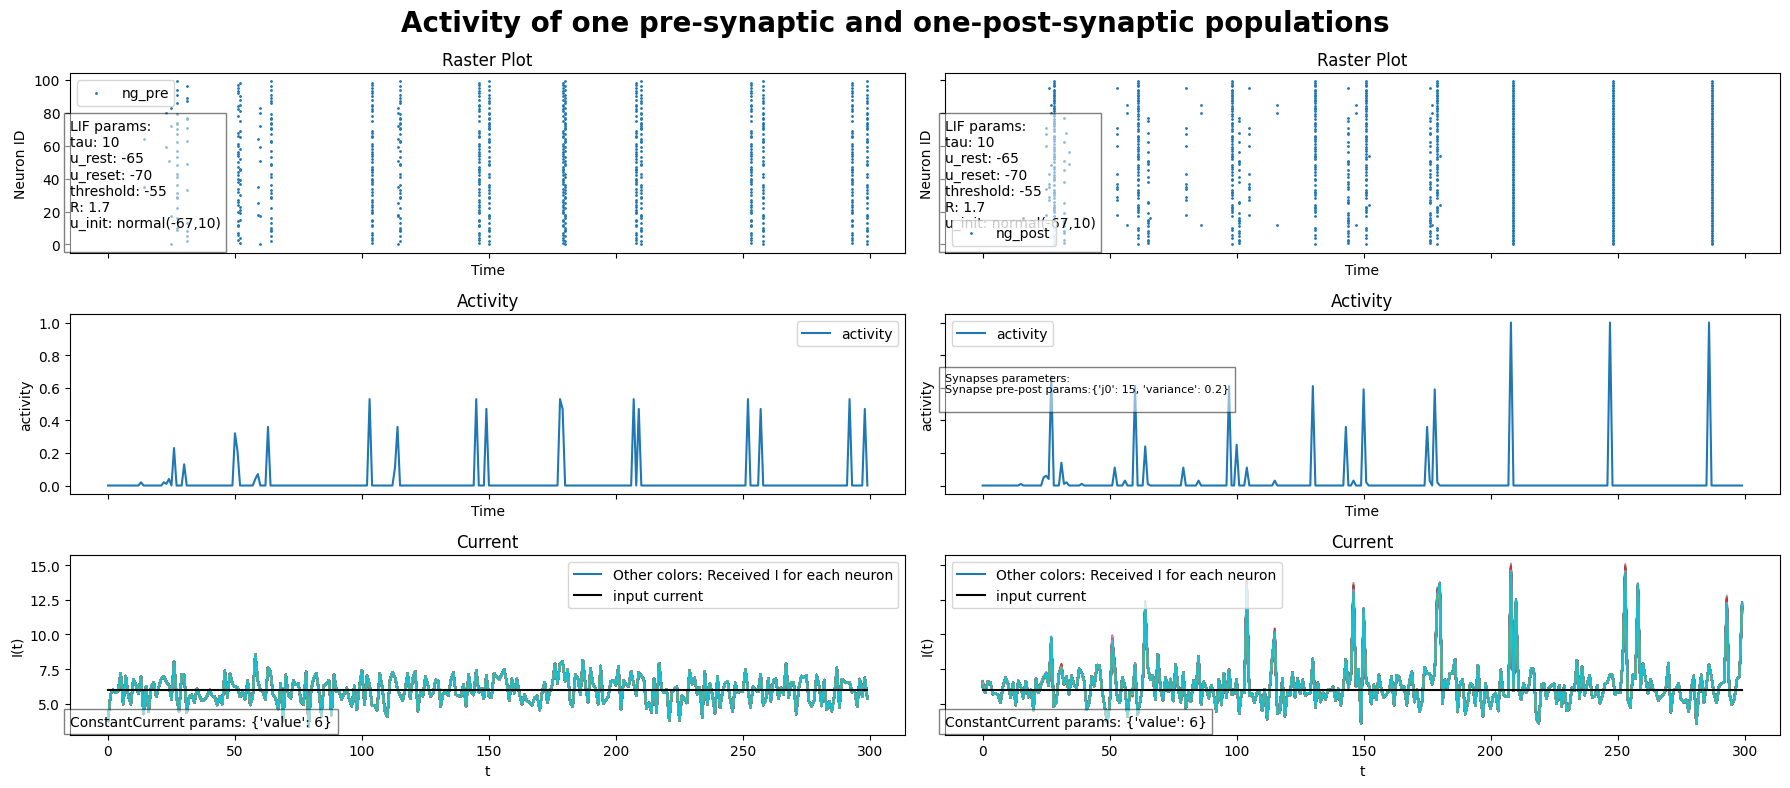

In [119]:
fig, axs = plt.subplots(3, 2, figsize=(18, 8), sharex=True, sharey='row')
# Raster plot for ng1:
ng_pre.add_raster_plot(axs[0, 0], s=1)
ng_pre.add_neuron_model_params_info(axs[0, 0], model_idx=7)
# Raster plot for ng2:
ng_post.add_raster_plot(axs[0, 1], s=1)
ng_post.add_neuron_model_params_info(axs[0, 1], model_idx=7)

# Activity plot for ng1:
ng_pre.add_activity_plot(axs[1, 0])
# Activity plot for ng1:
ng_post.add_activity_plot(axs[1, 1])
syn.add_synapses_params_info(axs[1, 1], synapse_idx=3)

# Current plot for ng1:
ng_pre.add_current_plot(axs[2, 0])
ng_post.add_current_params_info(axs[2, 0], current_idx=2)
# Current plot for ng2:
ng_post.add_current_plot(axs[2, 1])
ng_post.add_current_params_info(axs[2, 1], current_idx=2)


fig.suptitle("Activity of one pre-synaptic and one-post-synaptic populations", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-two-ng-with-synapse-noise-curr.pdf")
plt.show()

Now we change the initial membrane potential of source neurons and see the results:

In [128]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_pre = sim.add_neuron_group(
    tag="ng_pre",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6, noise_range=0.2),

        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_pre_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_pre_event")
    }
)
ng_post = sim.add_neuron_group(
    tag="ng_post",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6, noise_range=0.2),

        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_post_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_post_event")
    }
)
syn = sim.add_synapse_group(
                   tag="pre-post",
                   src=ng_pre,
                   dst=ng_post,
                   behavior={3: FullyConnectedSynapse(j0=15, variance=0.2)})

sim.simulate(iterations=300)

Network['Network_1', 'Network'](Neurons: tensor(200)|2 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_pre', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,noise_range=0.2,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_pre_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_pre_event,)}
NeuronGroup['ng_post', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,noise_range=0.2,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_post_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate

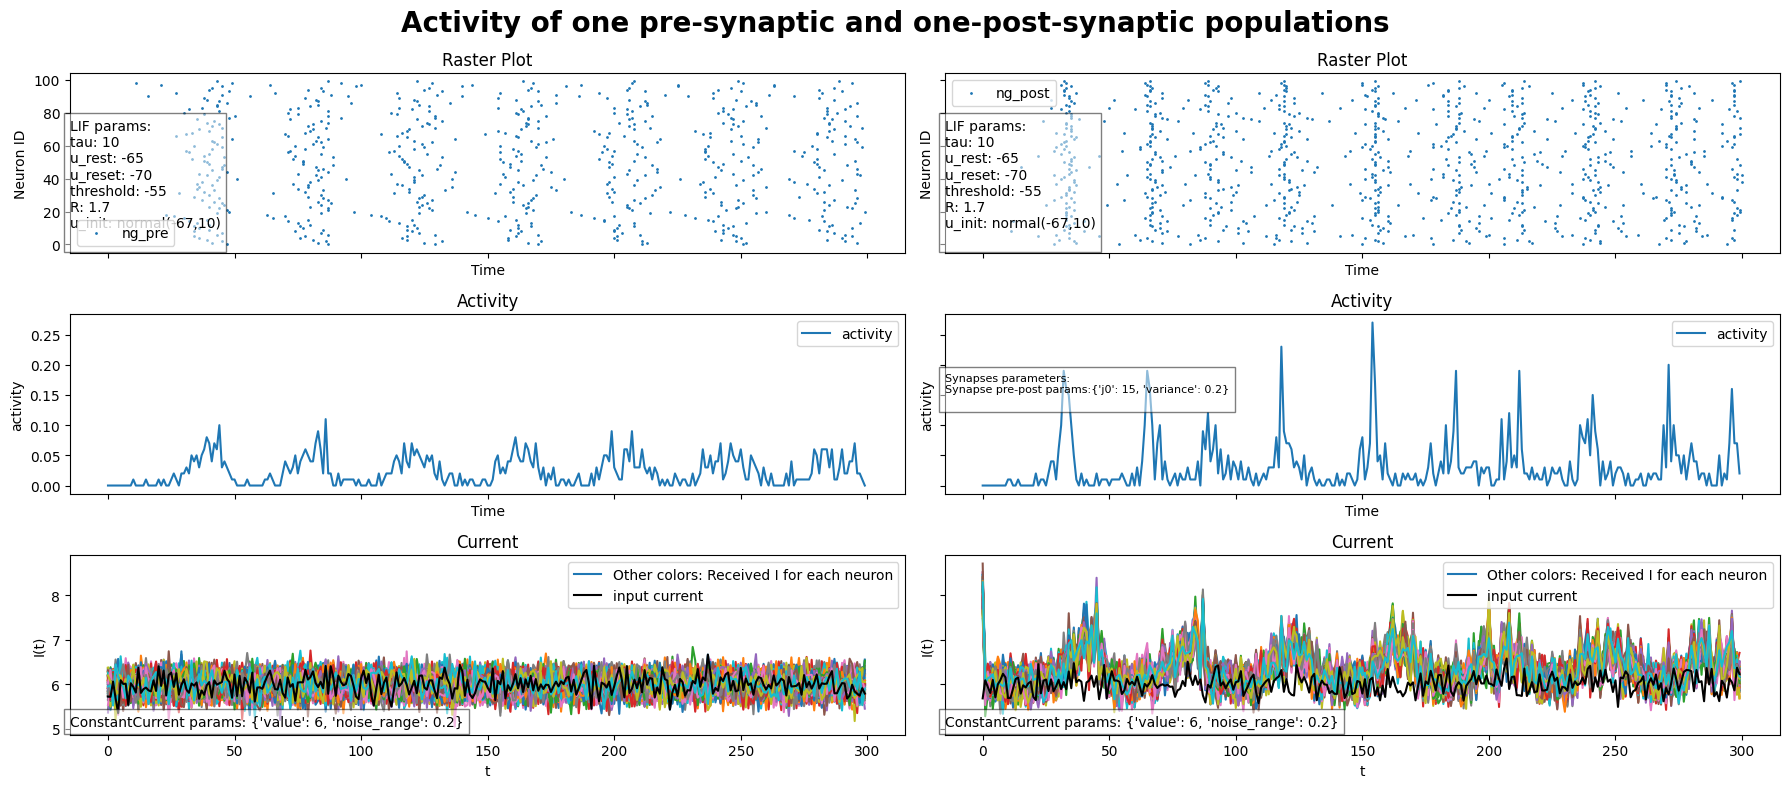

In [129]:
fig, axs = plt.subplots(3, 2, figsize=(18, 8), sharex=True, sharey='row')
# Raster plot for ng1:
ng_pre.add_raster_plot(axs[0, 0], s=1)
ng_pre.add_neuron_model_params_info(axs[0, 0], model_idx=7)
# Raster plot for ng2:
ng_post.add_raster_plot(axs[0, 1], s=1)
ng_post.add_neuron_model_params_info(axs[0, 1], model_idx=7)

# Activity plot for ng1:
ng_pre.add_activity_plot(axs[1, 0])
# Activity plot for ng1:
ng_post.add_activity_plot(axs[1, 1])
syn.add_synapses_params_info(axs[1, 1], synapse_idx=3)

# Current plot for ng1:
ng_pre.add_current_plot(axs[2, 0])
ng_post.add_current_params_info(axs[2, 0], current_idx=2)
# Current plot for ng2:
ng_post.add_current_plot(axs[2, 1])
ng_post.add_current_params_info(axs[2, 1], current_idx=2)


fig.suptitle("Activity of one pre-synaptic and one-post-synaptic populations", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-two-ng-with-synapse-diff-curr.pdf")
plt.show()

And if we increase the range a little more:

In [130]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_pre = sim.add_neuron_group(
    tag="ng_pre",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6, noise_range=0.5),

        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_pre_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_pre_event")
    }
)
ng_post = sim.add_neuron_group(
    tag="ng_post",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6, noise_range=0.5),

        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_post_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_post_event")
    }
)
syn = sim.add_synapse_group(
                   tag="pre-post",
                   src=ng_pre,
                   dst=ng_post,
                   behavior={3: FullyConnectedSynapse(j0=15, variance=0.2)})

sim.simulate(iterations=300)

Network['Network_1', 'Network'](Neurons: tensor(200)|2 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_pre', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,noise_range=0.5,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_pre_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_pre_event,)}
NeuronGroup['ng_post', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,noise_range=0.5,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_post_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate

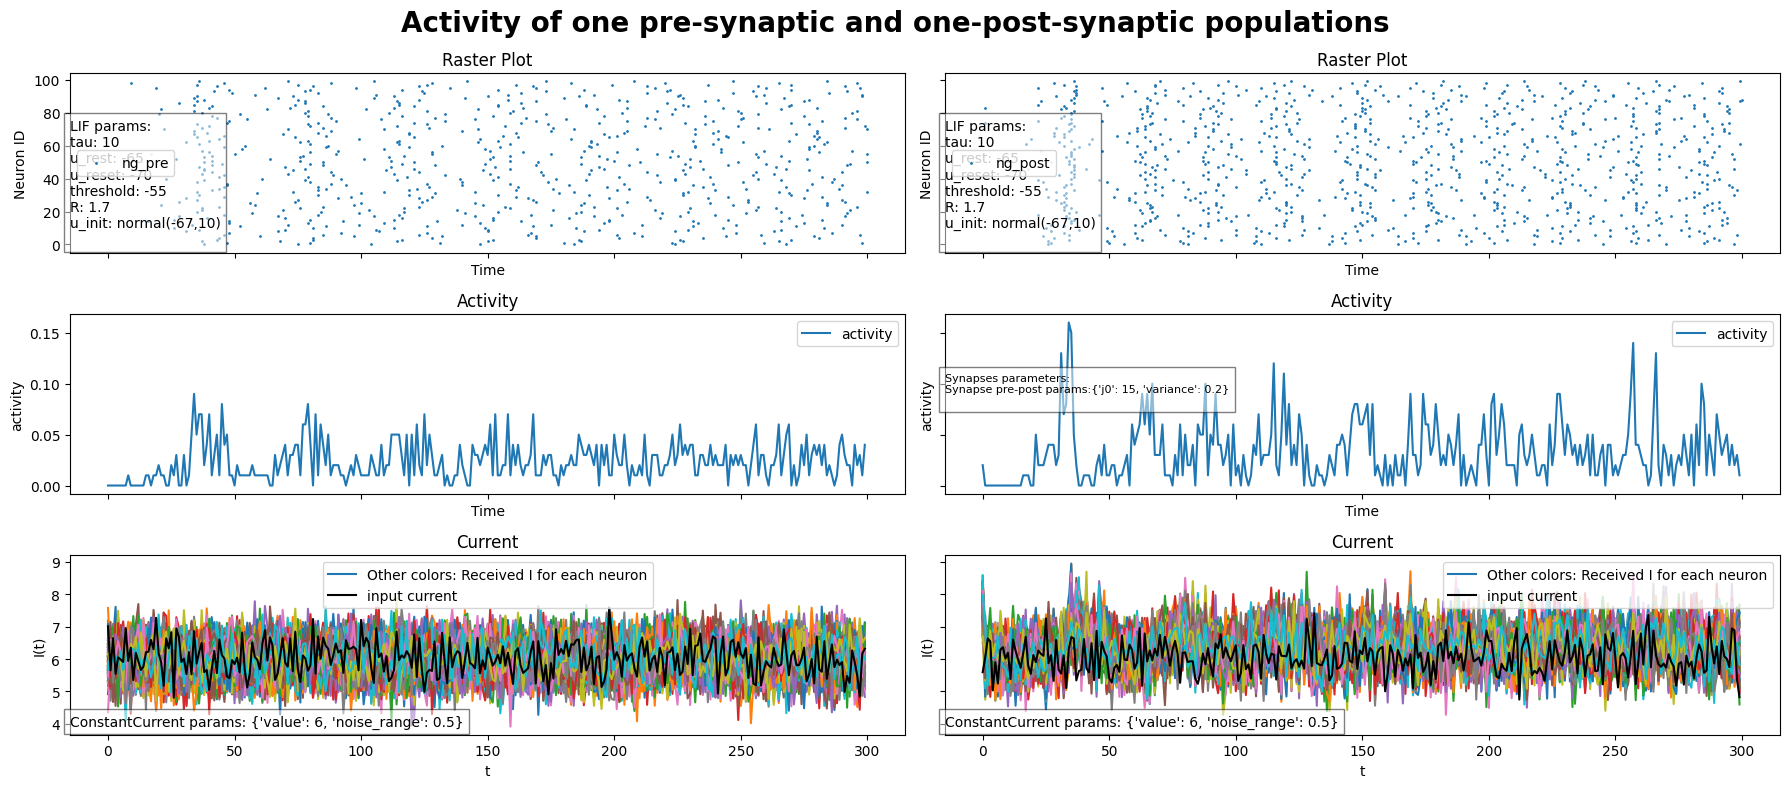

In [131]:
fig, axs = plt.subplots(3, 2, figsize=(18, 8), sharex=True, sharey='row')
# Raster plot for ng1:
ng_pre.add_raster_plot(axs[0, 0], s=1)
ng_pre.add_neuron_model_params_info(axs[0, 0], model_idx=7)
# Raster plot for ng2:
ng_post.add_raster_plot(axs[0, 1], s=1)
ng_post.add_neuron_model_params_info(axs[0, 1], model_idx=7)

# Activity plot for ng1:
ng_pre.add_activity_plot(axs[1, 0])
# Activity plot for ng1:
ng_post.add_activity_plot(axs[1, 1])
syn.add_synapses_params_info(axs[1, 1], synapse_idx=3)

# Current plot for ng1:
ng_pre.add_current_plot(axs[2, 0])
ng_post.add_current_params_info(axs[2, 0], current_idx=2)
# Current plot for ng2:
ng_post.add_current_plot(axs[2, 1])
ng_post.add_current_params_info(axs[2, 1], current_idx=2)


fig.suptitle("Activity of one pre-synaptic and one-post-synaptic populations", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-two-ng-with-synapse-high-diff-curr.pdf")
plt.show()

And now, to simulate better what happens in real neurons, we add noise to the postsynaptic neurons too:

In [137]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_pre = sim.add_neuron_group(
    tag="ng_pre",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6, noise_range=0.5),

        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_pre_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_pre_event")
    }
)
ng_post = sim.add_neuron_group(
    tag="ng_post",
    size=100,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=6, noise_range=0.5),

        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_post_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_post_event")
    }
)
syn = sim.add_synapse_group(
                   tag="pre-post",
                   src=ng_pre,
                   dst=ng_post,
                   behavior={3: FullyConnectedSynapse(j0=75, variance=0.2)})

sim.simulate(iterations=300)

Network['Network_1', 'Network'](Neurons: tensor(200)|2 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_pre', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,noise_range=0.5,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_pre_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_pre_event,)}
NeuronGroup['ng_post', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent(value=0,)2:ConstantCurrent(value=6,noise_range=0.5,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_post_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate

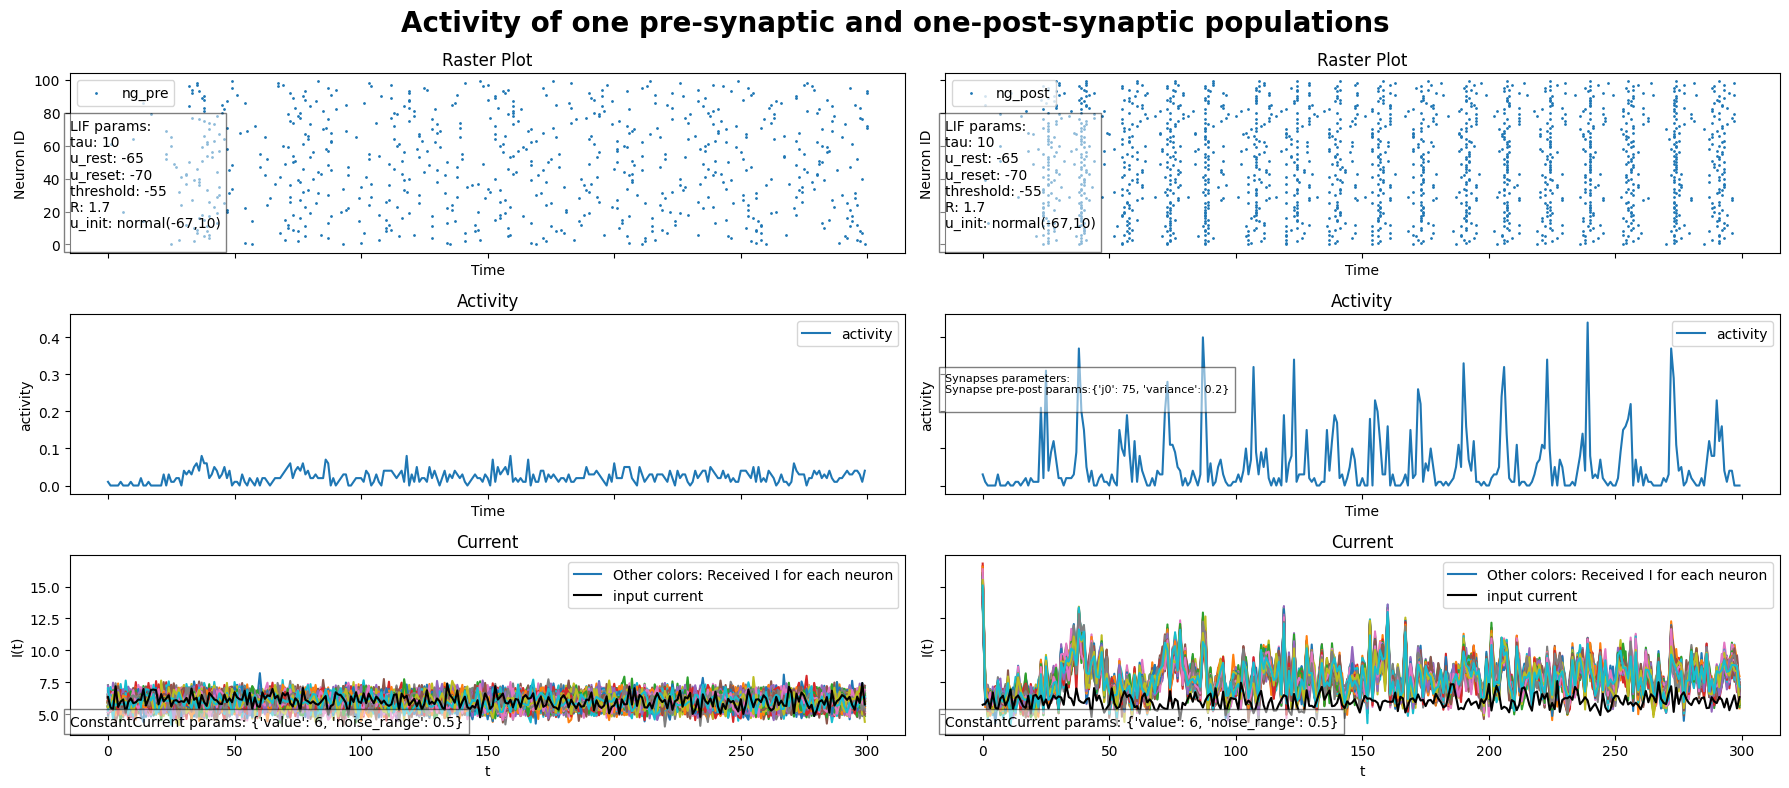

In [138]:
fig, axs = plt.subplots(3, 2, figsize=(18, 8), sharex=True, sharey='row')
# Raster plot for ng1:
ng_pre.add_raster_plot(axs[0, 0], s=1)
ng_pre.add_neuron_model_params_info(axs[0, 0], model_idx=7)
# Raster plot for ng2:
ng_post.add_raster_plot(axs[0, 1], s=1)
ng_post.add_neuron_model_params_info(axs[0, 1], model_idx=7)

# Activity plot for ng1:
ng_pre.add_activity_plot(axs[1, 0])
# Activity plot for ng1:
ng_post.add_activity_plot(axs[1, 1])
syn.add_synapses_params_info(axs[1, 1], synapse_idx=3)

# Current plot for ng1:
ng_pre.add_current_plot(axs[2, 0])
ng_post.add_current_params_info(axs[2, 0], current_idx=2)
# Current plot for ng2:
ng_post.add_current_plot(axs[2, 1])
ng_post.add_current_params_info(axs[2, 1], current_idx=2)


fig.suptitle("Activity of one pre-synaptic and one-post-synaptic populations", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("report/plots/part1-two-ng-with-synapse-high-diff-curr-high-j.pdf")
plt.show()